### Importing Modules, Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "amazon_products_sales_data_uncleaned.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ikramshah512/amazon-products-sales-dataset-42k-items-2025",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

Using Colab cache for faster access to the 'amazon-products-sales-dataset-42k-items-2025' dataset.


### Detecting Duplicates and Missing Values

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

,0
title,0
rating,1024
number_of_reviews,1024
bought_in_last_month,3217
current/discounted_price,11749
price_on_variant,0
listed_price,0
is_best_seller,0
is_sponsored,0
is_couponed,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

## Handling inconsistent formats, Converting Data types and Missing values

### Inconsistent formats

In [7]:
df['rating'].head()

,rating
0,4.6 out of 5 stars
1,4.3 out of 5 stars
2,4.6 out of 5 stars
3,4.6 out of 5 stars
4,4.8 out of 5 stars


In [8]:
df['rating'] = df['rating'].str.split().str[0].astype(float)

In [9]:
df['rating'].head()

,rating
0,4.6
1,4.3
2,4.6
3,4.6
4,4.8


In [10]:
df['bought_in_last_month'].head()

,bought_in_last_month
0,300+ bought in past month
1,6K+ bought in past month
2,2K+ bought in past month
3,10K+ bought in past month
4,10K+ bought in past month


In [11]:
df['bought_in_last_month'] = df['bought_in_last_month'].str.split().str[0]
df['bought_in_last_month'] = df['bought_in_last_month'].apply(lambda x: x[:-1] if str(x).endswith('+') else x)
df['bought_in_last_month'] = df['bought_in_last_month'].str.replace("K","000")

In [12]:
df['bought_in_last_month'].head()

,bought_in_last_month
0,300
1,6000
2,2000
3,10000
4,10000


In [13]:
df['listed_price'].head()

,listed_price
0,$159.00
1,$15.99
2,$349.00
3,No Discount
4,No Discount


In [14]:
df['listed_price'] = df['listed_price'].str.replace('$','')

In [15]:
df[['listed_price','price_on_variant','current/discounted_price']].head()

,listed_price,price_on_variant,current/discounted_price
0,159.00,basic variant price: 2.4GHz,89.68
1,15.99,basic variant price: nan,9.99
2,349.00,basic variant price: nan,314.00
3,No Discount,basic variant price: $162.24,NaN
4,No Discount,basic variant price: $72.74,NaN


In [16]:
df['price_on_variant'] = df['price_on_variant'].str.split().str[-1]

In [17]:
df['price_on_variant'] = df['price_on_variant'].str.replace('$','')

In [18]:
df[['listed_price','price_on_variant','current/discounted_price']].head()

,listed_price,price_on_variant,current/discounted_price
0,159.00,2.4GHz,89.68
1,15.99,nan,9.99
2,349.00,nan,314.00
3,No Discount,162.24,NaN
4,No Discount,72.74,NaN


In [19]:
df['current/discounted_price'].fillna(df['price_on_variant'], inplace=True)

In [20]:
df[['listed_price','price_on_variant','current/discounted_price']].head()

,listed_price,price_on_variant,current/discounted_price
0,159.00,2.4GHz,89.68
1,15.99,nan,9.99
2,349.00,nan,314.00
3,No Discount,162.24,162.24
4,No Discount,72.74,72.74


In [21]:
df.loc[df['listed_price'] == 'No Discount', 'listed_price'] = df['current/discounted_price']

In [22]:
df[['listed_price','price_on_variant','current/discounted_price']].head()

,listed_price,price_on_variant,current/discounted_price
0,159.00,2.4GHz,89.68
1,15.99,nan,9.99
2,349.00,nan,314.00
3,162.24,162.24,162.24
4,72.74,72.74,72.74


In [23]:
df.isna().sum()

,0
title,0
rating,1024
number_of_reviews,1024
bought_in_last_month,3217
current/discounted_price,0
price_on_variant,0
listed_price,0
is_best_seller,0
is_sponsored,0
is_couponed,0


Can't Convert string in bought_in_last_month to integer (checking unique values)

In [24]:
df[['number_of_reviews','listed_price','current/discounted_price']]

,number_of_reviews,listed_price,current/discounted_price
0,375,159.00,89.68
1,"2,457",15.99,9.99
2,"3,044",349.00,314.00
3,"35,882",162.24,162.24
4,"28,988",72.74,72.74
...,...,...,...
42670,1,195.99,195.99
42671,20,89.99,89.99
42672,57,"1,099.99",899.99
42673,"7,102",15.98,10.39


In [25]:
for c in ['number_of_reviews','listed_price','current/discounted_price']:
    df[c] = df[c].str.replace(',','')

In [26]:
df['delivery_details'] = df['delivery_details'].str.extract(r'(?:Mon|Tue|Wed|Thu|Fri|Sat|Sun)?,?\s*(\w+\s+\d{1,2})')
df['delivery_details'] = pd.to_datetime(df['delivery_details'] + ' 2025', errors='coerce')
df['delivery_details'] = df['delivery_details'].fillna(method='ffill')

In [27]:
df['OrderMonth'] = df['delivery_details'].dt.month
df['OrderDayOfWeek'] = df['delivery_details'].dt.day_name()
df[['delivery_details', 'OrderMonth', 'OrderDayOfWeek']]

,delivery_details,OrderMonth,OrderDayOfWeek
0,2025-09-01,9,Monday
1,2025-08-29,8,Friday
2,2025-09-01,9,Monday
3,2025-09-01,9,Monday
4,2025-09-01,9,Monday
...,...,...,...
42670,2025-09-04,9,Thursday
42671,2025-09-04,9,Thursday
42672,2025-09-04,9,Thursday
42673,2025-09-04,9,Thursday


### Converting Data types

Converting columns to numeric with errors='coerce' as temp to identify the original data of the not converted rows

In [28]:
df['temp'] = pd.to_numeric(df['listed_price'], errors='coerce')
print(df[df['temp'].isna()]['listed_price'].unique())
df.drop('temp',axis=1,inplace=True)

['Count' '1)' 'nan' 'count' 'USB' 'Set' 'Office' '5)' 'Polyethylene' '4)'
 '6)' 'Cleanser' 'Wired' '2)' 'XLR' 'ac' 'Wireless' '3)' '4-pin' '12)'
 'Shoe']


In [29]:
df['temp'] = pd.to_numeric(df['current/discounted_price'], errors='coerce')
print(df[df['temp'].isna()]['current/discounted_price'].unique())
df.drop('temp',axis=1,inplace=True)

['Count' '1)' 'nan' 'count' 'USB' 'Set' 'Office' '5)' 'Polyethylene' '4)'
 '6)' 'Cleanser' 'Wired' '2)' 'XLR' 'ac' 'Wireless' '3)' '4-pin' '12)'
 'Shoe']


In [30]:
df['temp'] = pd.to_numeric(df['bought_in_last_month'], errors='coerce')
print(df[df['temp'].isna()]['bought_in_last_month'].unique())
df.drop('temp',axis=1,inplace=True)

[nan 'List' 'Typical:' 'ESRB' 'No' 'List:' 'This' 'More'
 '($1,999.75$1,999.75/100' 'Shop' '($54.26$54.26/count)' 'New'
 '($1,315.78$1,315.78/kg)' 'Alexa' '($4,813.00$4,813.00/100'
 '($433.33$433.33/count)' '($252.00$252.00/count)'
 '($1,080.00$1,080.00/kg)' '($46.81$46.81/oz)' '($828.56$828.56/kg)'
 '($53.33$53.33/count)' '($30.00$30.00/count)' '($766.33$766.33/in)'
 '($2.18$2.18/count)' '($5.27$5.27/in)' '($179.99$179.99/count)'
 '($43.69$43.69/oz)' 'Was:']


Converting the numeric values to float and int

In [31]:
for c in ['listed_price', 'current/discounted_price', 'price_on_variant']:
    df[c] = pd.to_numeric(df[c], errors='coerce')
for c in ['number_of_reviews','bought_in_last_month']:
    df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     42675 non-null  object        
 1   rating                    41651 non-null  float64       
 2   number_of_reviews         41651 non-null  Int64         
 3   bought_in_last_month      32164 non-null  Int64         
 4   current/discounted_price  40613 non-null  float64       
 5   price_on_variant          19015 non-null  float64       
 6   listed_price              40613 non-null  float64       
 7   is_best_seller            42675 non-null  object        
 8   is_sponsored              42675 non-null  object        
 9   is_couponed               42675 non-null  object        
 10  buy_box_availability      28022 non-null  object        
 11  delivery_details          42675 non-null  datetime64[ns]
 12  sustainability_bad

In [33]:
df['collected_at'].head()

,collected_at
0,2025-08-21 11:14:29
1,2025-08-21 11:14:29
2,2025-08-21 11:14:29
3,2025-08-21 11:14:29
4,2025-08-21 11:14:29


Collected_at is the datetime when the data were collected (irrelevant for data analysis)

In [34]:
df.drop('collected_at',axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     42675 non-null  object        
 1   rating                    41651 non-null  float64       
 2   number_of_reviews         41651 non-null  Int64         
 3   bought_in_last_month      32164 non-null  Int64         
 4   current/discounted_price  40613 non-null  float64       
 5   price_on_variant          19015 non-null  float64       
 6   listed_price              40613 non-null  float64       
 7   is_best_seller            42675 non-null  object        
 8   is_sponsored              42675 non-null  object        
 9   is_couponed               42675 non-null  object        
 10  buy_box_availability      28022 non-null  object        
 11  delivery_details          42675 non-null  datetime64[ns]
 12  sustainability_bad

In [36]:
df[['image_url','product_url']].head()

,image_url,product_url
0,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...
1,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...
2,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...
3,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...
4,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...


product_url and image_url are not relevant to data analysis

In [37]:
df.drop(['image_url','product_url'],axis=1,inplace=True)

In [38]:
df.isna().sum()

,0
title,0
rating,1024
number_of_reviews,1024
bought_in_last_month,10511
current/discounted_price,2062
price_on_variant,23660
listed_price,2062
is_best_seller,0
is_sponsored,0
is_couponed,0


## Filling the missing values

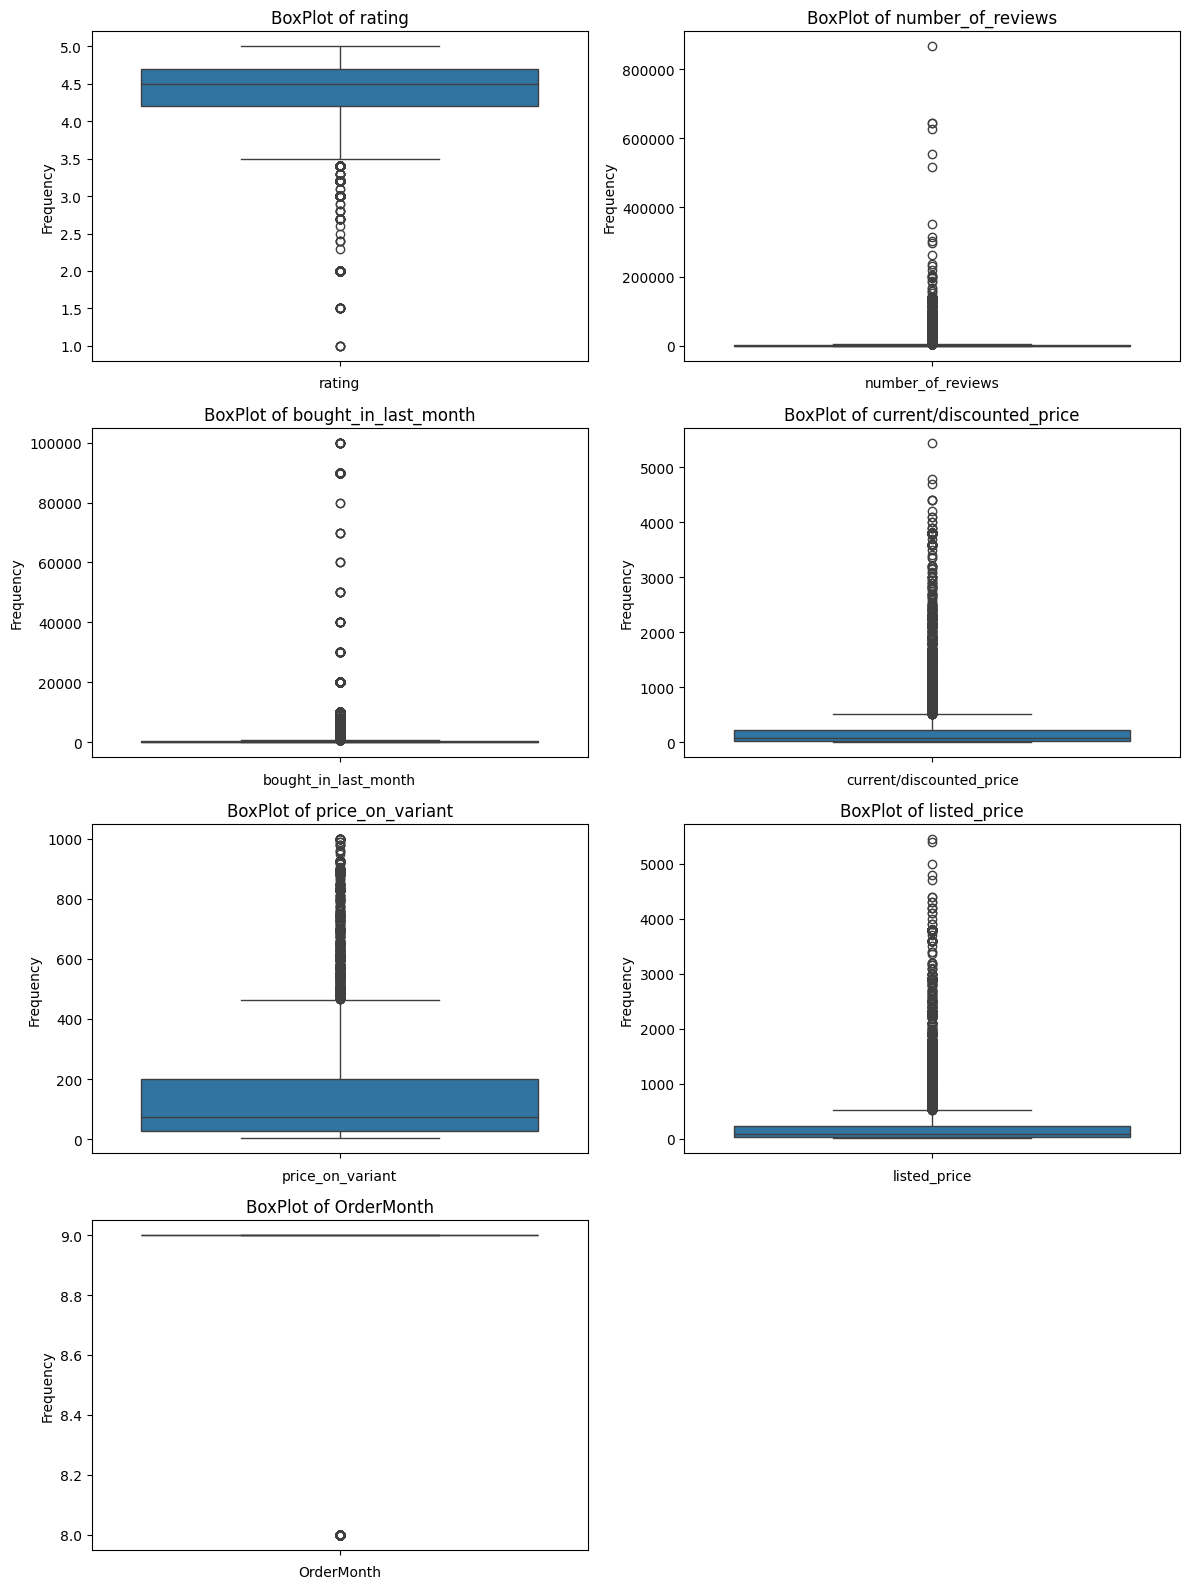

In [39]:
numeric_cols = df.select_dtypes(include=['number']).columns

num_plots = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.boxplot(df[col])

    plt.title(f'BoxPlot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
df.describe()

,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,delivery_details,OrderMonth
count,41651.000000,41651.0,32164.0,40613.000000,19015.000000,40613.000000,42675,42675.000000
mean,4.399431,3087.106,1293.665278,243.227289,145.691821,257.611107,2025-09-04 16:48:33.405975296,8.987674
min,1.000000,1.0,50.0,2.160000,2.160000,2.160000,2025-08-27 00:00:00,8.000000
25%,4.200000,82.0,100.0,29.690000,25.585000,32.990000,2025-09-02 00:00:00,9.000000
50%,4.500000,343.0,200.0,84.990000,73.990000,89.000000,2025-09-04 00:00:00,9.000000
75%,4.700000,1886.0,400.0,224.000000,201.020000,229.990000,2025-09-08 00:00:00,9.000000
max,5.000000,865598.0,100000.0,5449.000000,999.000000,5449.000000,2025-09-29 00:00:00,9.000000
std,0.386997,13030.460133,6318.323574,473.351545,174.743369,496.633495,NaN,0.110336


In [41]:
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [42]:
df['number_of_reviews'] = df['number_of_reviews'].fillna(df['number_of_reviews'].median())

In [43]:
df['bought_in_last_month'] = df['bought_in_last_month'].fillna(df['bought_in_last_month'].median())

In [44]:
df['listed_price'] = df['listed_price'].fillna(df['listed_price'].median())

In [45]:
df['current/discounted_price'] = df['current/discounted_price'].fillna(df['current/discounted_price'].median())

In [46]:
df['delivery_details']

,delivery_details
0,2025-09-01
1,2025-08-29
2,2025-09-01
3,2025-09-01
4,2025-09-01
...,...
42670,2025-09-04
42671,2025-09-04
42672,2025-09-04
42673,2025-09-04


In [47]:
df['buy_box_availability']

,buy_box_availability
0,Add to cart
1,Add to cart
2,Add to cart
3,NaN
4,NaN
...,...
42670,NaN
42671,Add to cart
42672,Add to cart
42673,Add to cart


In [48]:
df['buy_box_availability'] = df['buy_box_availability'].fillna("not available")

In [49]:
print(df['sustainability_badges'].isna().sum()/len(df))

0.920140597539543


In [50]:
df['sustainability_badges'].unique()

array(['Carbon impact', nan, 'Energy efficiency',
       'Safer chemicals +1 more', 'Small Business',
       '1 sustainability certification', 'Works with Alexa',
       'Manufacturing practices', 'Forestry practices', 'Alexa Built-in',
       'Energy efficiency +3 more', 'Recycled materials',
       'Safer chemicals +2 more', 'Energy efficiency +1 more',
       'Recycled materials +3 more', 'Recycled materials +2 more',
       'Made in Italy'], dtype=object)

In [51]:
df.drop('sustainability_badges',axis=1,inplace=True)

In [52]:
df['discount'] = (df['listed_price'] - df['current/discounted_price'])/df['listed_price']

In [53]:
df.drop(['current/discounted_price','price_on_variant'],axis=1,inplace=True)

In [54]:
df.isna().sum()

,0
title,0
rating,0
number_of_reviews,0
bought_in_last_month,0
listed_price,0
is_best_seller,0
is_sponsored,0
is_couponed,0
buy_box_availability,0
delivery_details,0


In [55]:
df.groupby('title').agg({'rating':'mean'}).sort_values(by='rating',ascending=False).head(10)

,rating
title,
"Sony RX100 VII Premium Compact Camera with 1.0-Type Stacked CMOS Sensor (DSCRX100M7), Bundle with 64GB Memory Card, Camera Bag",5.0
"ASUS Zenbook A14; Copilot+ PC, Ultrathin Laptop, 14” WUXGA OLED, Snapdragon® X Processor, 16 GB Memory, 512GB SSD, Wi-Fi 6E, Zabriskie Beige, UX3407QA-DS52-CB",5.0
"Insta360 X5 Replacement Lens Complete Kit | with 2× Official Replaceable Lenses for Insta360 X5, Plus Tools to Replace and Clean The Lens",5.0
"Taramps HD 3000 1 Ohm Black 1 Channel Amplifier 3000 Watts RMS MAX, Mosfet Digital Full Range Crossover, Low/High Pass, Bass Boost, Car Audio System, Monoblock 3k, LED Monitor Indicator, Class D",5.0
"Lenovo ThinkPad X1 Carbon Gen 12 21KC00A7US 14"" Touchscreen Notebook - WUXGA - Core Ultra 7 155U - Evo Platform - 32GB - 512 GB SSD - Windows 11 Professional",5.0
"HP Chromebook Plus x360 14 2 in 1 laptop (14"" FHD Touchscreen, Intel 8-Core i3-N305 (> i5-1134G7), 8GB RAM, 256GB UFS, Pen) for Home & Students, Backlit KB, 1080p Webcam, Chrome OS w/ Google AI",5.0
"HP Chromebook Laptop 15 ( 15.6"" Anti-Glare, Intel N200 (> i3-1115G4), 8GB DDR5 RAM, 128GB Storage (64GB eMMC + 64GB SD Card), Numeric KB) Home & Student, Webcam w/Shutter, Wi-Fi, Chrome OS, Silver",5.0
"Lenovo IdeaPad Slim 3 Chromebook Laptop (14"" FHD Touchscreen, 8-Core MediaTek Kompanio 520, 4GB RAM, 128GB (64GB eMMC+64GB SD)), Anti-Glare, Webcam, 13-Hr Long Battery Life, IST HUB, Chrome OS, Blue",5.0
"Dell Pro Thunderbolt 4 Smart Dock SD25TB4 – USB-C Station 130W, 4 Displays 4K, 2X DP 1.4, HDMI 2.1, 2X Thunderbolt 4, 2.5GbE, Wi-Fi, Sustainable Design",5.0


In [56]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

category_keywords = {
    'Laptops': [
        'laptop', 'notebook', 'macbook', 'chromebook', 'ultrabook', 'acer', 'asus', 'dell', 'lenovo', 'hp', 'core',
        'intel', 'ryzen', 'surface', 'thinkpad', 'ideapad'
    ],
    'Phones': [
        'phone', 'iphone', 'smartphone', 'samsung', 'android', 'galaxy', 'pixel', 'oneplus', 'xiaomi', 'oppo',
        'realme', 'huawei', 'vivo', 'nokia', 'motorola'
    ],
    'Headphones': [
        'headphone', 'headset', 'earphone', 'earbuds', 'airpods', 'beats', 'sony wh', 'wireless buds', 'neckband'
    ],
    'Chargers & Cables': [
        'charger', 'charging', 'cable', 'adapter', 'dock', 'usb c', 'type c', 'lightning', 'power adapter', 'usb cable'
    ],
    'Cameras': [
        'camera', 'dslr', 'mirrorless', 'canon', 'nikon', 'gopro', 'instax', 'webcam', 'camcorder', 'security camera'
    ],
    'Storage': [
        'ssd', 'hard drive', 'memory card', 'flash drive', 'pendrive', 'hdd', 'storage', 'micro sd', 'sd card'
    ],
    'Smart Home': [
        'alexa', 'echo', 'smart plug', 'smart bulb', 'smart home', 'nest', 'homekit', 'smart switch'
    ],
    'TV & Display': [
        'monitor', 'display', 'tv', 'screen', 'projector', 'oled', 'led', 'curved monitor', 'uhd', '4k'
    ],
    'Power & Batteries': [
        'battery', 'power bank', 'rechargeable', 'aa', 'aaa', 'portable power', 'cell'
    ],
    'Networking': [
        'wifi', 'router', 'modem', 'ethernet', 'access point', 'mesh', 'network switch'
    ],
    'Wearables': [
        'smartwatch', 'fitness band', 'fitbit', 'watch', 'garmin', 'amazfit'
    ],
    'Speakers': [
        'speaker', 'soundbar', 'subwoofer', 'bluetooth speaker', 'party speaker', 'home theater'
    ],
    'Printers & Scanners': [
        'printer', 'scanner', 'inkjet', 'laserjet', 'photocopier', 'all in one printer'
    ],
    'Gaming': [
        'gaming console', 'playstation', 'ps5', 'ps4', 'xbox', 'nintendo', 'joystick', 'controller', 'gaming mouse',
        'gaming keyboard', 'gaming chair'
    ],
    'Other Electronics': []
}

def assign_category_simple(title):
    title_clean = clean_text(title)
    for category, keywords in category_keywords.items():
        for kw in keywords:
            if kw in title_clean:
                return category
    return 'Other Electronics'

In [57]:
df['category'] = df['title'].apply(assign_category_simple)

print(df['category'].value_counts())

category
Other Electronics      8755
Laptops                8693
Phones                 6563
Cameras                3677
Power & Batteries      2877
TV & Display           2630
Chargers & Cables      1833
Storage                1630
Speakers               1345
Networking             1070
Headphones              997
Printers & Scanners     877
Gaming                  809
Smart Home              465
Wearables               454
Name: count, dtype: int64


In [58]:
df.columns

Index(['title', 'rating', 'number_of_reviews', 'bought_in_last_month',
       'listed_price', 'is_best_seller', 'is_sponsored', 'is_couponed',
       'buy_box_availability', 'delivery_details', 'OrderMonth',
       'OrderDayOfWeek', 'discount', 'category'],
      dtype='object')

In [59]:
df = df.rename(columns={'title': 'product_title','rating':'product_rating','number_of_reviews':'total_reviews','bought_in_last_month':'purchased_last_month','listed_price':'price','buy_box_availability':'is_available','is_best_seller':'badge'})


In [60]:
df[['price','purchased_last_month']]

,price,purchased_last_month
0,159.00,300
1,15.99,6000
2,349.00,2000
3,162.24,10000
4,72.74,10000
...,...,...
42670,195.99,100
42671,89.99,200
42672,1099.99,50
42673,15.98,500


In [61]:
df['gross_profit'] = df['price']*df['purchased_last_month']

In [62]:
df[['price','purchased_last_month','gross_profit']]

,price,purchased_last_month,gross_profit
0,159.00,300,47700.0
1,15.99,6000,95940.0
2,349.00,2000,698000.0
3,162.24,10000,1622400.0
4,72.74,10000,727400.0
...,...,...,...
42670,195.99,100,19599.0
42671,89.99,200,17998.0
42672,1099.99,50,54999.5
42673,15.98,500,7990.0


In [63]:
df

,product_title,product_rating,total_reviews,purchased_last_month,price,badge,is_sponsored,is_couponed,is_available,delivery_details,OrderMonth,OrderDayOfWeek,discount,category,gross_profit
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,9,Monday,0.435975,Phones,47700.0
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457,6000,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,8,Friday,0.375235,Laptops,95940.0
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044,2000,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,9,Monday,0.100287,Laptops,698000.0
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882,10000,162.24,Best Seller,Organic,No Coupon,not available,2025-09-01,9,Monday,0.000000,Phones,1622400.0
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988,10000,72.74,No Badge,Organic,No Coupon,not available,2025-09-01,9,Monday,0.000000,Phones,727400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0,1,100,195.99,No Badge,Organic,No Coupon,not available,2025-09-04,9,Thursday,0.000000,TV & Display,19599.0
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2,20,200,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,2025-09-04,9,Thursday,0.000000,Cameras,17998.0
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57,50,1099.99,Save 18%,Organic,No Coupon,Add to cart,2025-09-04,9,Thursday,0.181820,Chargers & Cables,54999.5
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102,500,15.98,No Badge,Organic,No Coupon,Add to cart,2025-09-04,9,Thursday,0.349812,Chargers & Cables,7990.0


## Insights with Visualization

In [64]:
df.groupby('category').agg({'product_rating':'mean'}).sort_values(by='product_rating',ascending=False).head(10)

,product_rating
category,
Power & Batteries,4.607473
Wearables,4.501322
Speakers,4.499554
Cameras,4.497552
TV & Display,4.486728
Smart Home,4.472688
Other Electronics,4.432386
Chargers & Cables,4.408292
Storage,4.360982


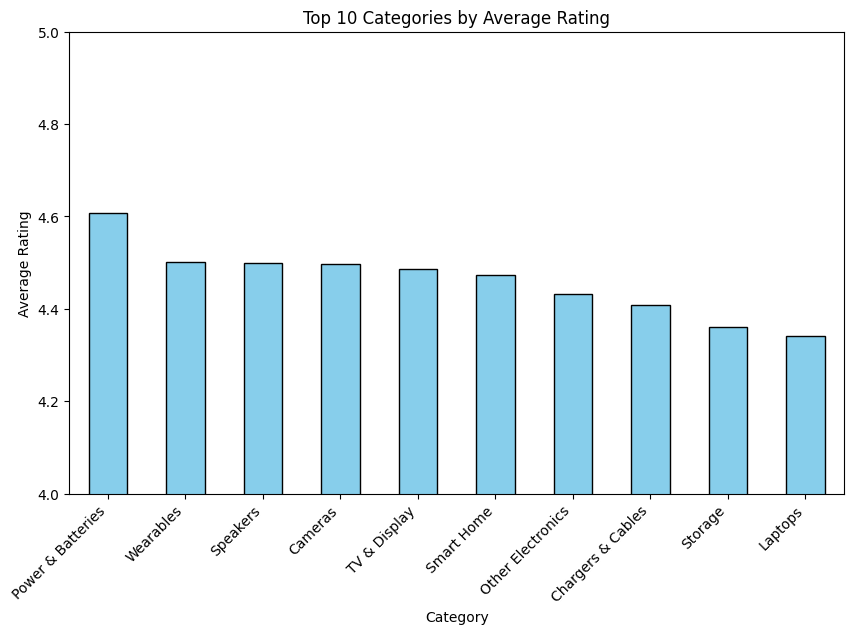

In [65]:
top_categories = df.groupby('category')['product_rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Categories by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.ylim(4, 5)
plt.show()

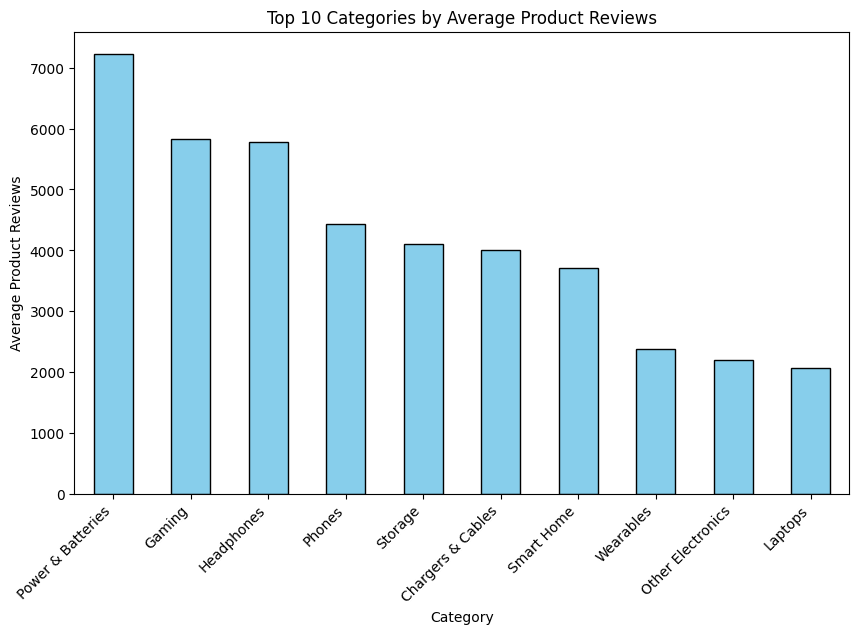

In [66]:
top_categories = df.groupby('category')['total_reviews'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Categories by Average Product Reviews')
plt.ylabel('Average Product Reviews')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()

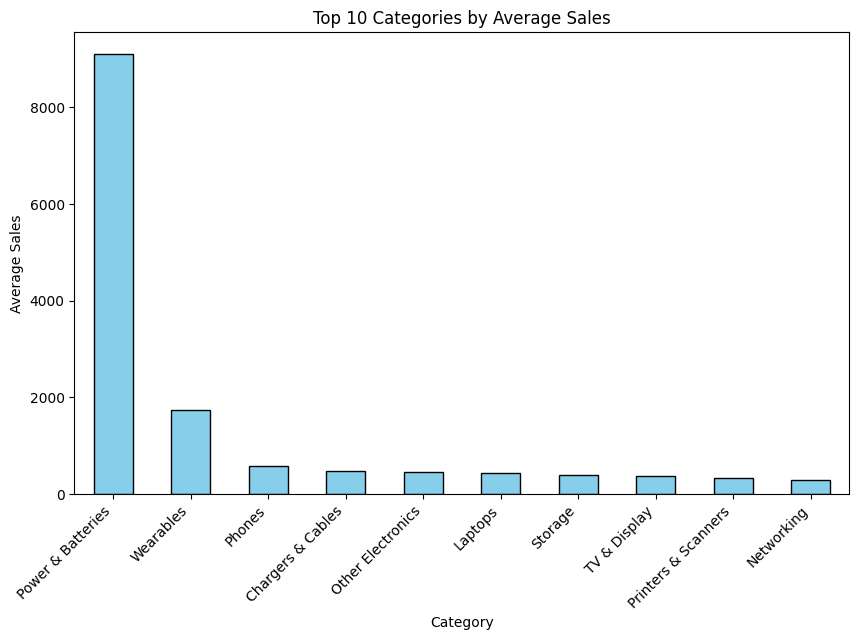

In [67]:
top_categories = df.groupby('category')['purchased_last_month'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Categories by Average Sales')
plt.ylabel('Average Sales')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()

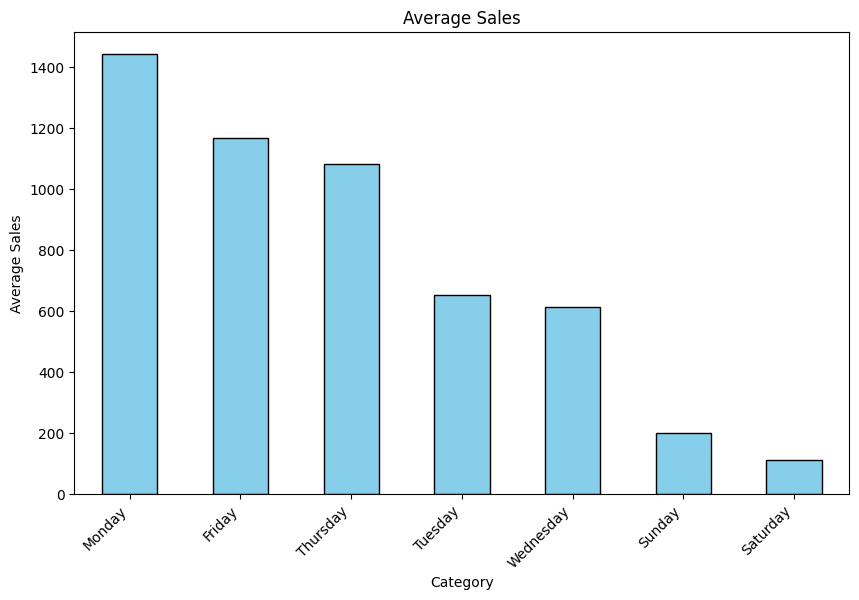

In [68]:
avg_sales = df.groupby('OrderDayOfWeek')['purchased_last_month'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_sales.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Sales')
plt.ylabel('Average Sales')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()

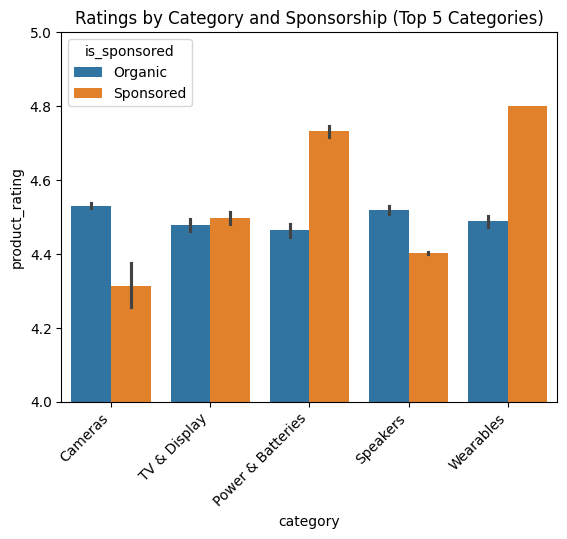

In [69]:
top5_categories = (
    df.groupby('category')['product_rating']
      .mean()
      .sort_values(ascending=False)
      .head(5)
      .index
)

df_top5 = df[df['category'].isin(top5_categories)]


sns.barplot(
    x='category',
    y='product_rating',
    hue='is_sponsored',
    data=df_top5
)

plt.title("Ratings by Category and Sponsorship (Top 5 Categories)")
plt.xticks(rotation=45, ha='right')
plt.ylim(4,5)
plt.show()

In [70]:
df.columns

Index(['product_title', 'product_rating', 'total_reviews',
       'purchased_last_month', 'price', 'badge', 'is_sponsored', 'is_couponed',
       'is_available', 'delivery_details', 'OrderMonth', 'OrderDayOfWeek',
       'discount', 'category', 'gross_profit'],
      dtype='object')

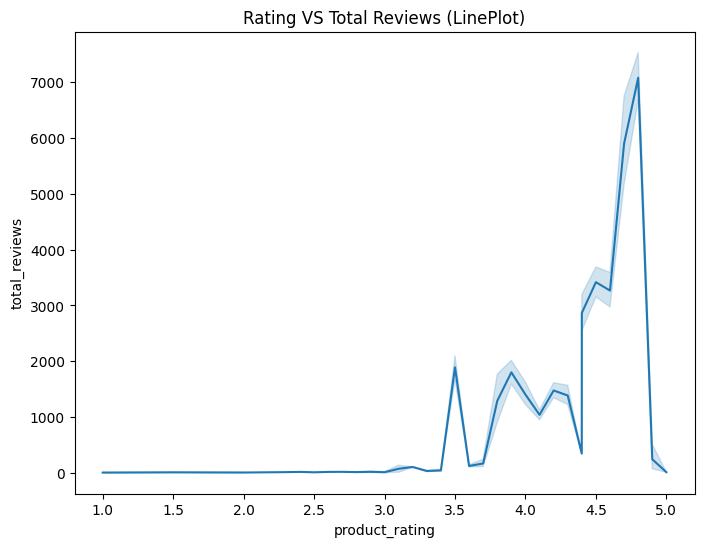

In [71]:
plt.figure(figsize=(8,6))
sns.lineplot(x='product_rating', y='total_reviews', data=df)
plt.title("Rating VS Total Reviews (LinePlot)")
plt.show()

In [72]:
# plt.figure(figsize=(8,6))
# sns.scatterplot(
#     data=df,
#     x='discount',
#     y='product_rating',
#     hue='is_sponsored',
#     alpha=0.5
# )

# plt.title('Reviews vs Sales')
# plt.xlabel('Number of Reviews')
# plt.ylabel('Sales')
# # plt.xlim(0,100000)
# #plt.ylim(4,5)
# plt.show()

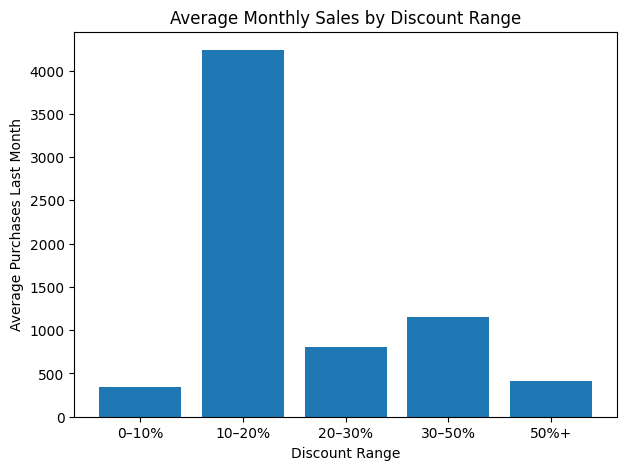

In [73]:
df['discount_bin'] = pd.cut(
    df['discount'],
    bins=[0, 0.1, 0.2, 0.3, 0.5, 1],
    labels=['0–10%', '10–20%', '20–30%', '30–50%', '50%+']
)
bin_sales = df.groupby('discount_bin')['purchased_last_month'].mean()

plt.figure(figsize=(7,5))
plt.bar(bin_sales.index.astype(str), bin_sales.values)

plt.xlabel('Discount Range')
plt.ylabel('Average Purchases Last Month')
plt.title('Average Monthly Sales by Discount Range')
plt.show()

In [74]:
df.drop('discount_bin',axis=1,inplace=True)

In [75]:
df.groupby('badge')['purchased_last_month'].mean()

,purchased_last_month
badge,
Amazon's,3992.405914
Best Seller,9031.636364
Ends in,409.278351
Limited time deal,6775.183374
No Badge,867.587102
Save 10%,200.0
Save 12%,50.0
Save 17%,100.0
Save 18%,50.0


In [76]:
df['best_seller_flag'] = df['badge'].isin(
    ["No Badge"]
)
df['best_seller_flag'].value_counts()

,count
best_seller_flag,
True,40814
False,1861


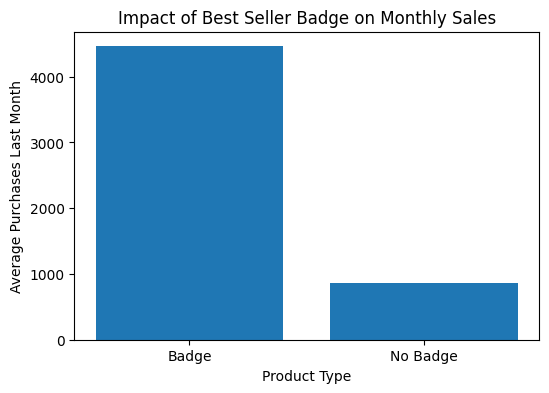

In [77]:
avg_sales = df.groupby('best_seller_flag')['purchased_last_month'].mean()

plt.figure(figsize=(6,4))
plt.bar(
    ['Badge', 'No Badge'],
    avg_sales.values
)
plt.xlabel('Product Type')
plt.ylabel('Average Purchases Last Month')
plt.title('Impact of Best Seller Badge on Monthly Sales')
plt.show()

In [78]:
df.describe()

,product_rating,total_reviews,purchased_last_month,price,delivery_details,OrderMonth,discount,gross_profit
count,42675.000000,42675.0,42675.0,42675.000000,42675,42675.000000,42675.000000,42675.0
mean,4.399431,3021.260316,1024.29174,249.464040,2025-09-04 16:48:33.405975296,8.987674,0.064485,66885.223738
min,1.000000,1.0,50.0,2.160000,2025-08-27 00:00:00,8.000000,0.000000,600.0
25%,4.200000,84.0,100.0,33.990000,2025-09-02 00:00:00,9.000000,0.000000,8397.0
50%,4.500000,343.0,200.0,89.000000,2025-09-04 00:00:00,9.000000,0.000000,15996.0
75%,4.600000,1825.5,300.0,219.000000,2025-09-08 00:00:00,9.000000,0.074077,35998.0
max,5.000000,865598.0,100000.0,5449.000000,2025-09-29 00:00:00,9.000000,0.854156,9995000.0
std,0.382326,12880.020115,5505.478841,485.833651,NaN,0.110336,0.124407,188876.030213


In [79]:
pearson_correlation = df.corr(numeric_only=True,method='pearson')
pearson_correlation

,product_rating,total_reviews,purchased_last_month,price,OrderMonth,discount,gross_profit,best_seller_flag
product_rating,1.000000,0.099697,0.135171,-0.060875,-0.003386,0.020047,0.096489,-0.059491
total_reviews,0.099697,1.000000,0.299165,-0.083525,-0.048276,0.028761,0.174374,-0.082131
purchased_last_month,0.135171,0.299165,1.000000,-0.070527,-0.056523,0.055711,0.630220,-0.133298
price,-0.060875,-0.083525,-0.070527,1.000000,-0.050769,-0.036467,0.384519,0.007540
OrderMonth,-0.003386,-0.048276,-0.056523,-0.050769,1.000000,0.005699,-0.099683,0.005264
discount,0.020047,0.028761,0.055711,-0.036467,0.005699,1.000000,0.008904,-0.141949
gross_profit,0.096489,0.174374,0.630220,0.384519,-0.099683,0.008904,1.000000,-0.134406
best_seller_flag,-0.059491,-0.082131,-0.133298,0.007540,0.005264,-0.141949,-0.134406,1.000000


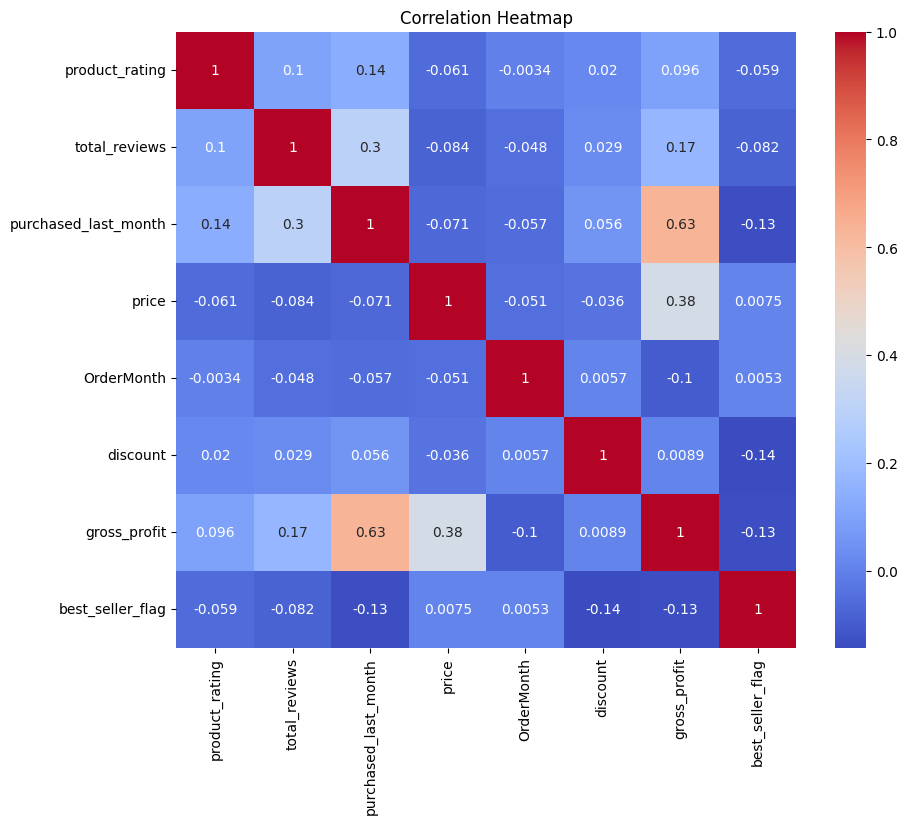

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson_correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [81]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,price,badge,is_sponsored,is_couponed,is_available,delivery_details,OrderMonth,OrderDayOfWeek,discount,category,gross_profit,best_seller_flag
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,9,Monday,0.435975,Phones,47700.0,True
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457,6000,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,8,Friday,0.375235,Laptops,95940.0,True
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044,2000,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,9,Monday,0.100287,Laptops,698000.0,True
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882,10000,162.24,Best Seller,Organic,No Coupon,not available,2025-09-01,9,Monday,0.000000,Phones,1622400.0,False
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988,10000,72.74,No Badge,Organic,No Coupon,not available,2025-09-01,9,Monday,0.000000,Phones,727400.0,True


## Handling Outliers

In [82]:
# mean = 4.4
# Z-Score
# std = 0.386
# range = [4.4+0.386*2   ,    4.4-0.386*2]
# range = [3.63 , 5]
# IQR 1.5*0.5 = 0.75
# range [3.45 , 5]

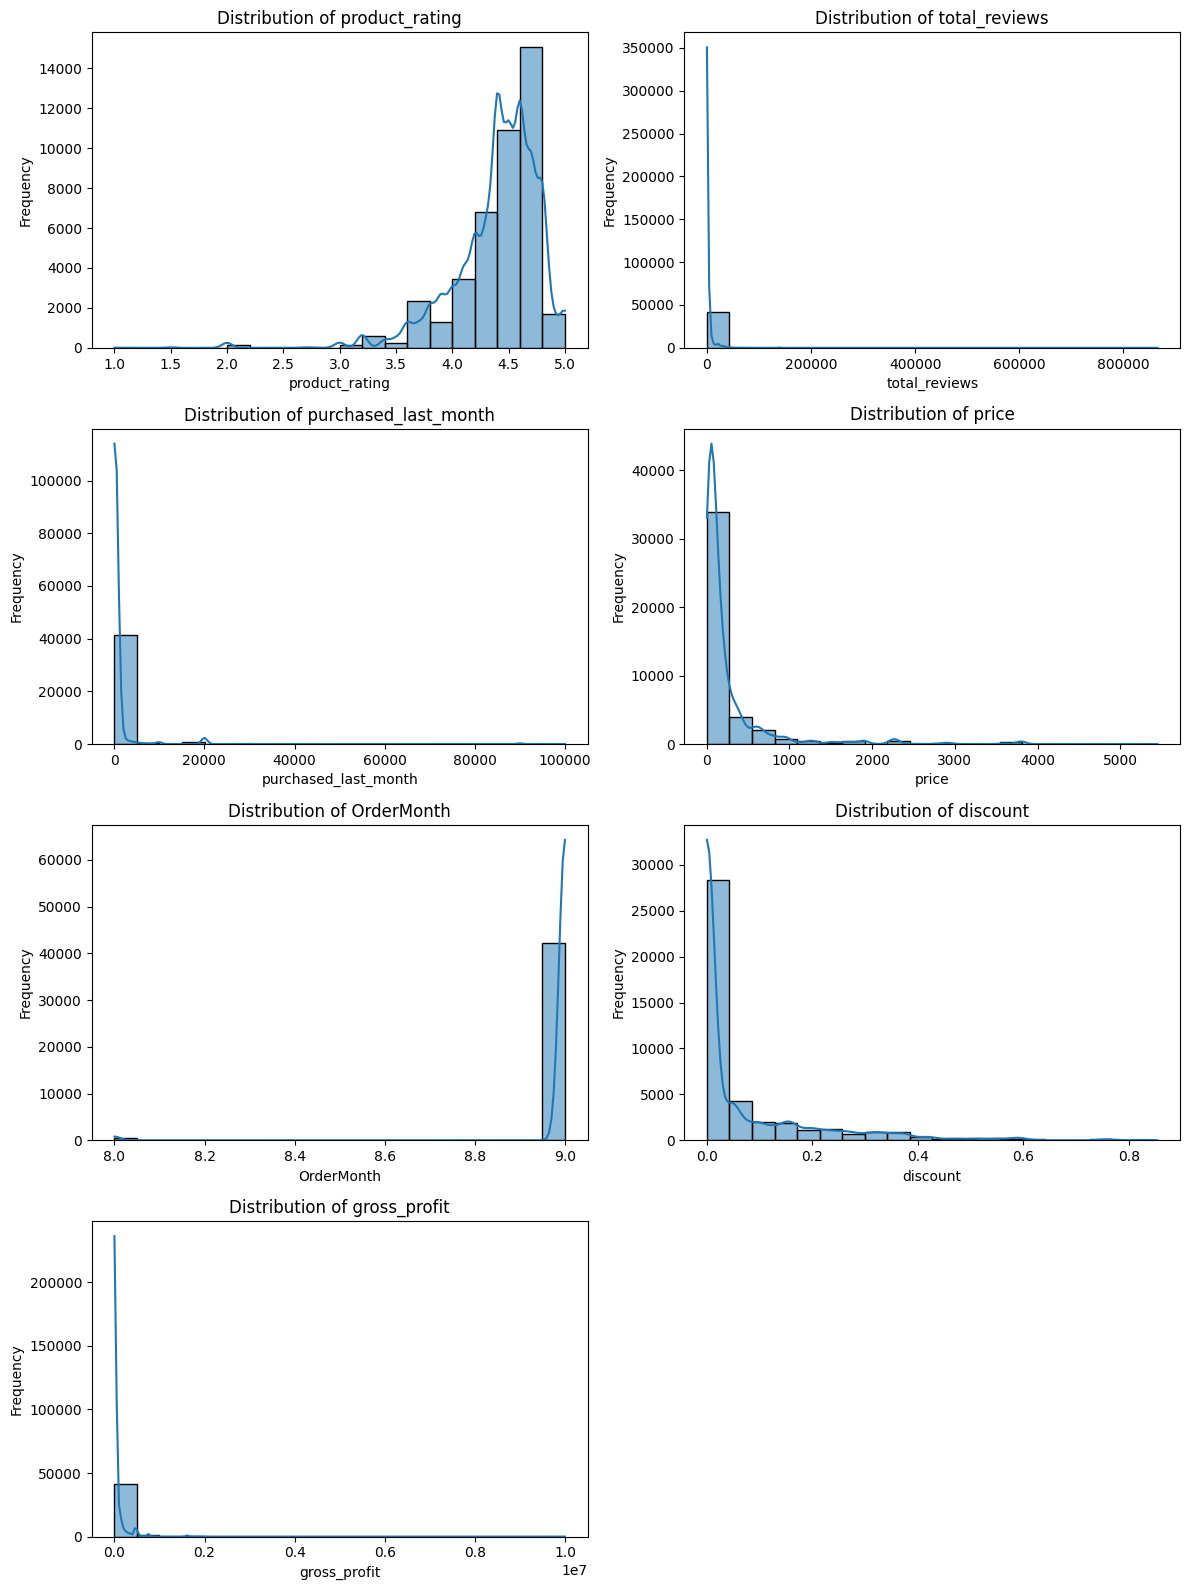

In [83]:
numeric_cols = df.select_dtypes(include=['number']).columns

num_plots = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(12, 4 * n_rows))


for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)


    sns.histplot(df[col], kde=True, bins=20, edgecolor='black')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

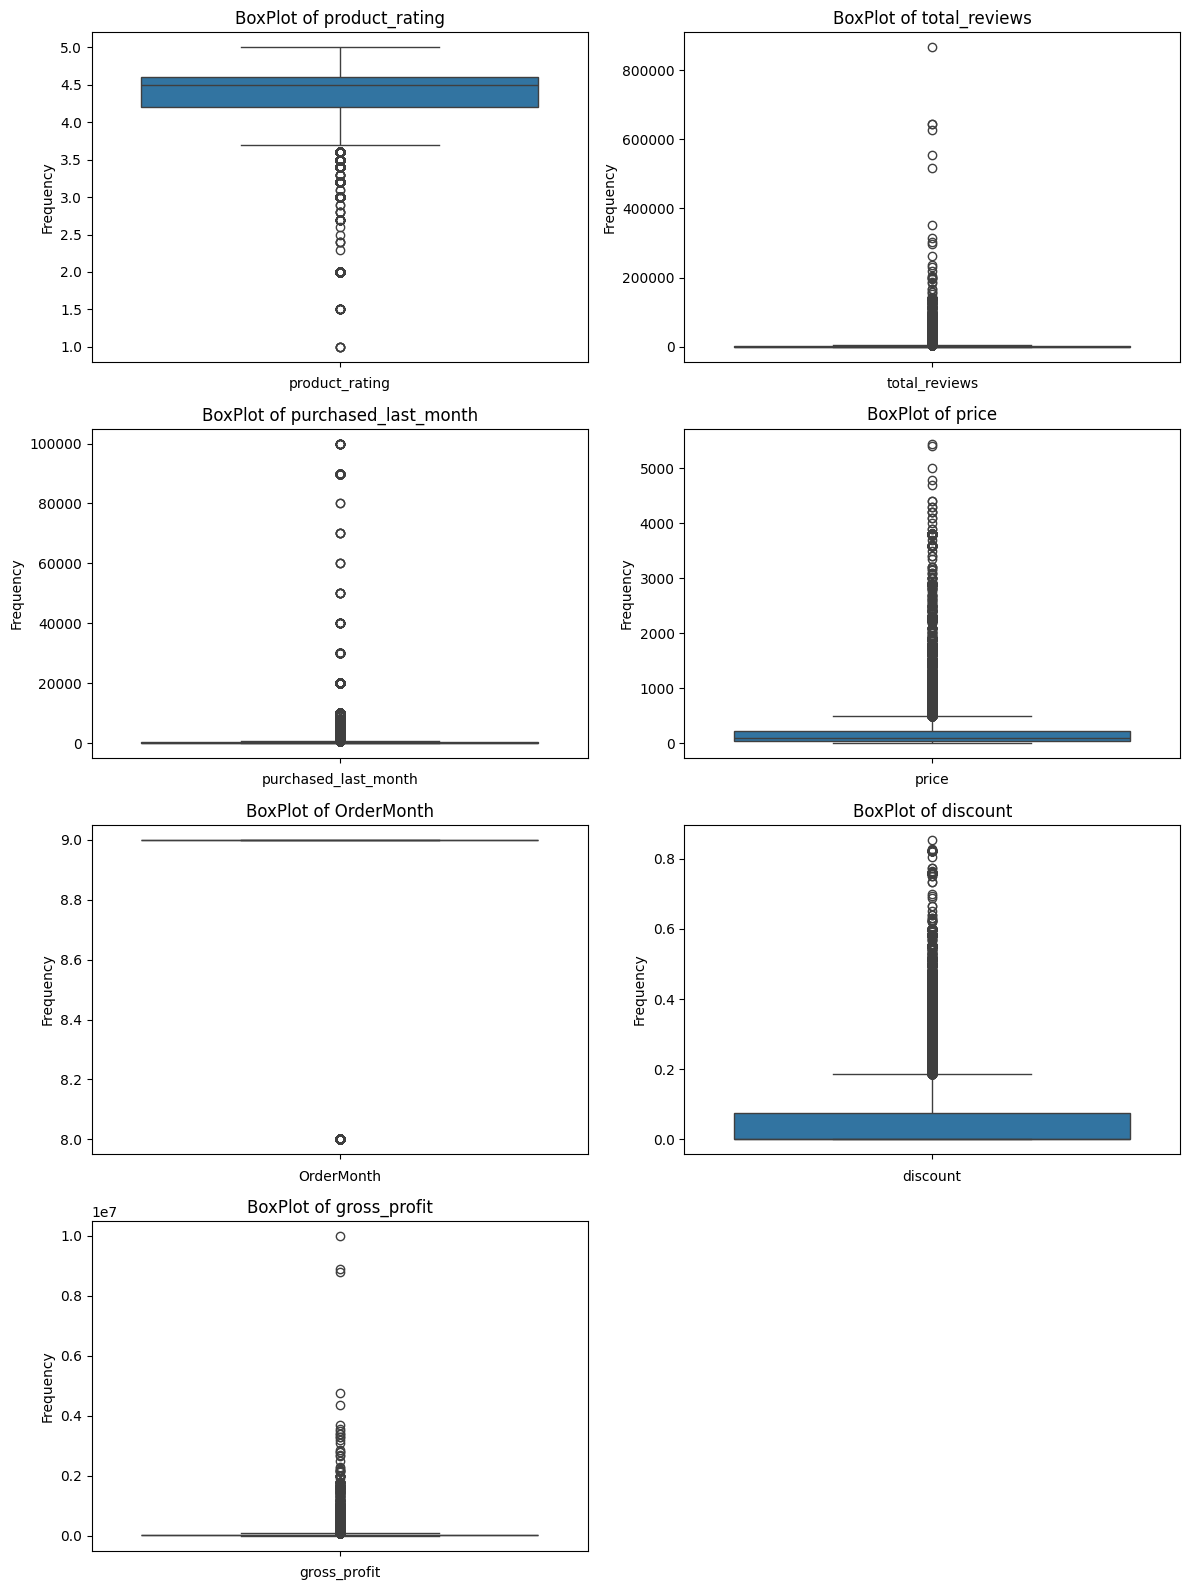

In [84]:
numeric_cols = df.select_dtypes(include=['number']).columns

num_plots = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.boxplot(df[col])

    plt.title(f'BoxPlot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Keeping a copy of the original data before Handling outliers


In [85]:
df_original = df.copy(deep=True)

In [86]:
for C in ['total_reviews','purchased_last_month','discount','price','product_rating']:
    Q1 = df[C].quantile(0.25)
    Q3 = df[C].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if type(df[C][0])== np.int64:
      df[C] = df[C].clip(lower=int(lower_bound),upper=int(upper_bound))
    else:
      df[C] = df[C].clip(lower=lower_bound, upper=upper_bound)

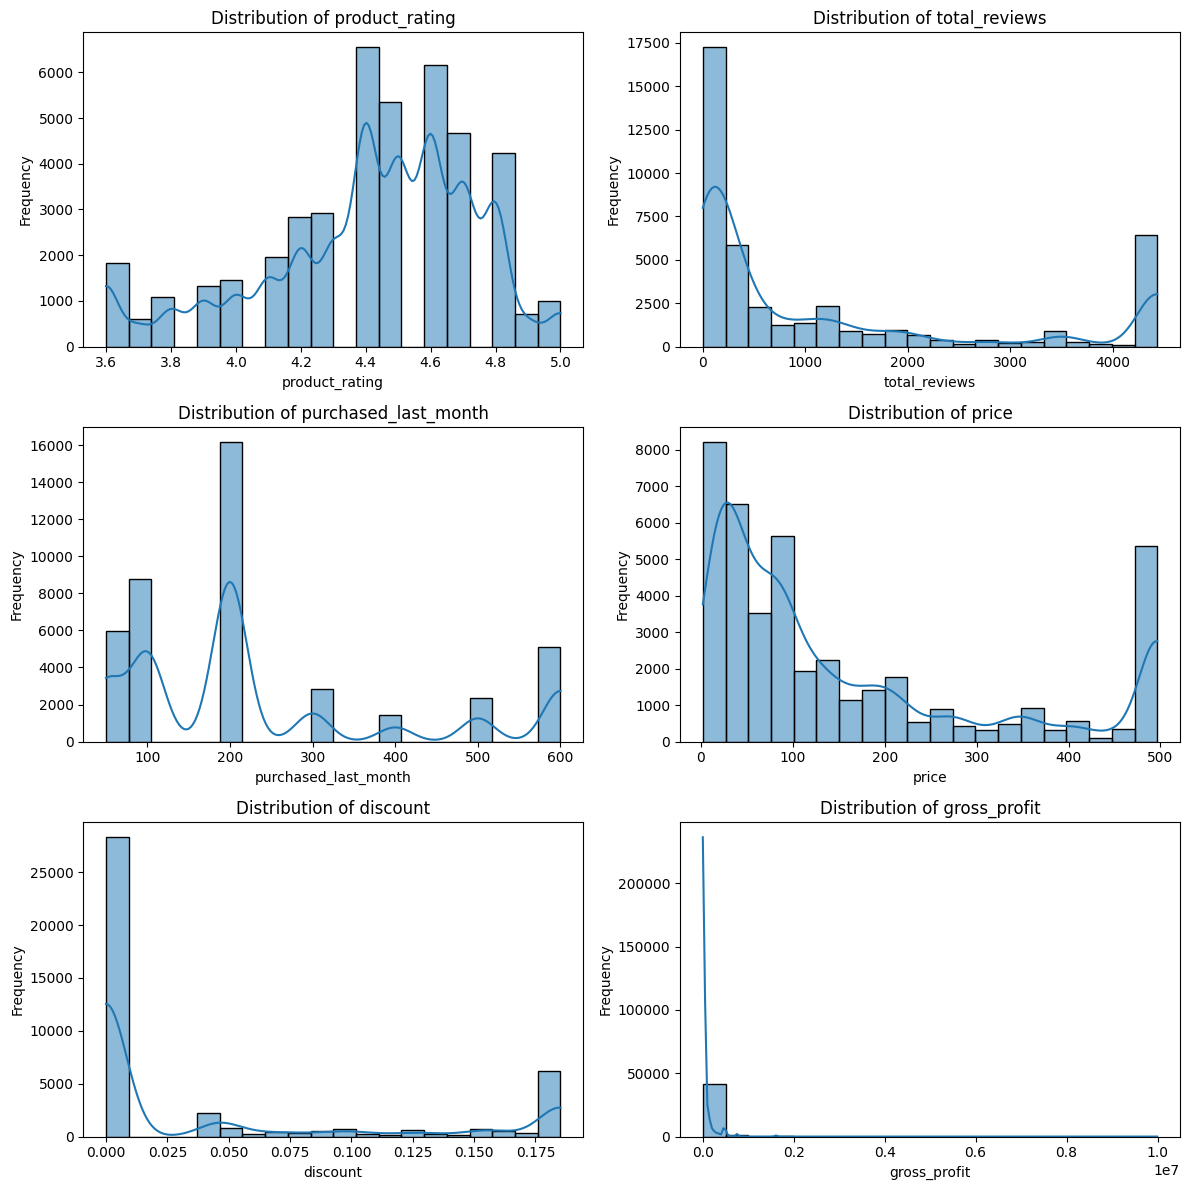

In [87]:
numeric_cols = df.drop('OrderMonth',axis=1).select_dtypes(include=['number']).columns

num_plots = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.histplot(df[col], kde=True, bins=20, edgecolor='black')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

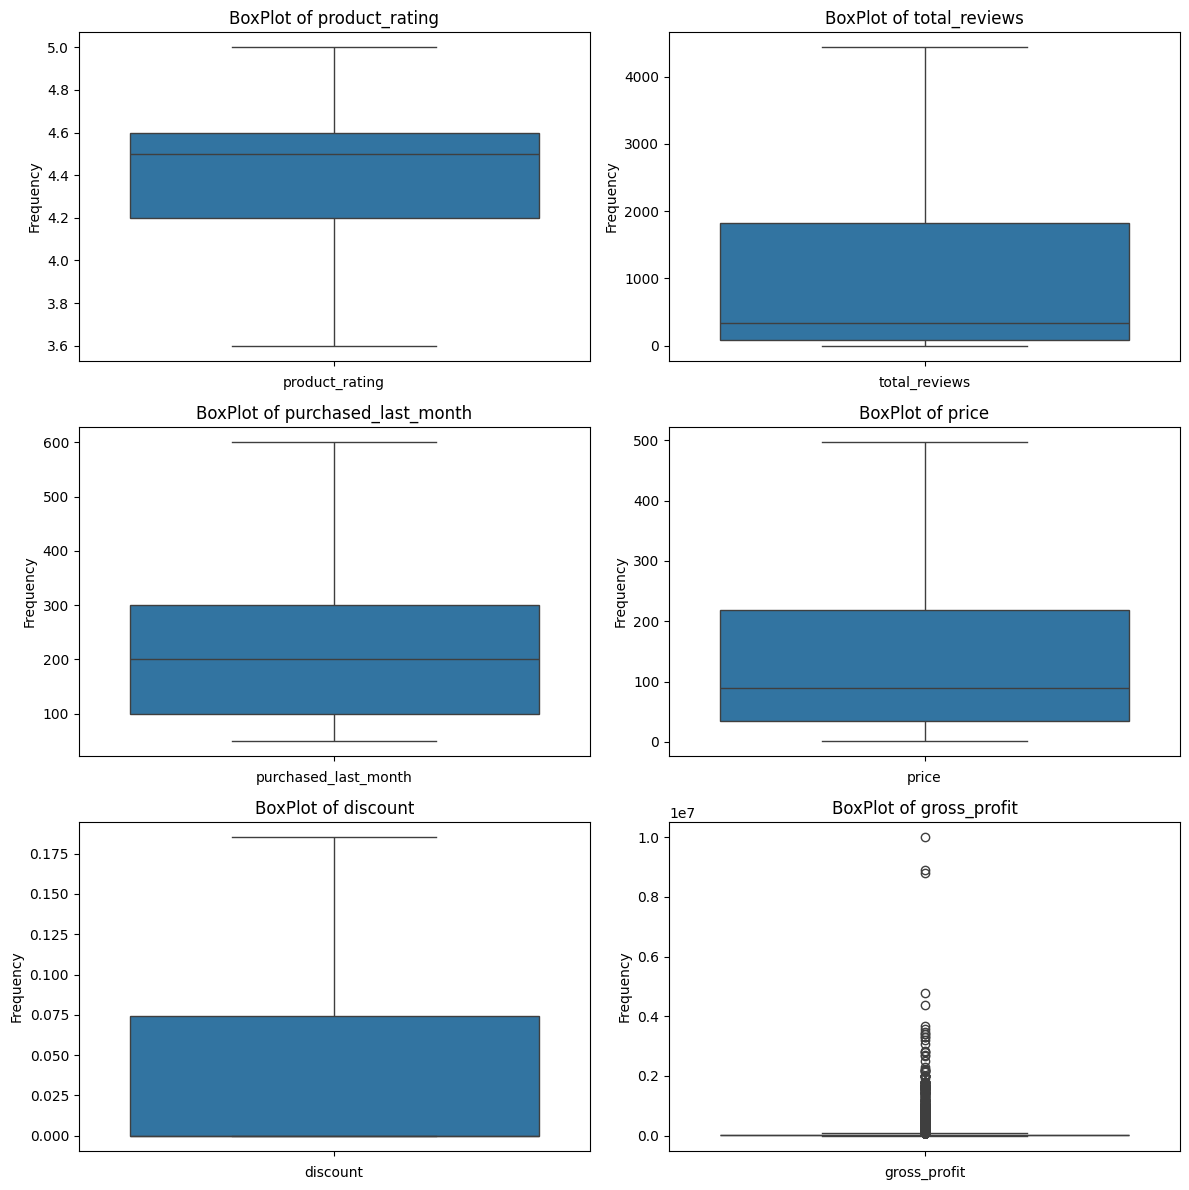

In [88]:
numeric_cols = df.drop('OrderMonth',axis=1).select_dtypes(include=['number']).columns

num_plots = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.boxplot(df[col])

    plt.title(f'BoxPlot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [89]:
df_without_outliers = df.copy(deep=True)

In [90]:
df.sort_values(by='price',ascending=False).head(10)

,product_title,product_rating,total_reviews,purchased_last_month,price,badge,is_sponsored,is_couponed,is_available,delivery_details,OrderMonth,OrderDayOfWeek,discount,category,gross_profit,best_seller_flag
11,Apple 2025 MacBook Air 13-inch Laptop with M4 ...,4.8,1914,600,496.515,Best Seller,Organic,No Coupon,not available,2025-08-29,8,Friday,0.000000,Laptops,8809500.0,False
42674,Lorex Fusion 1080p HD Security Camera System w...,4.4,75,50,496.515,No Badge,Organic,No Coupon,Add to cart,2025-09-04,9,Thursday,0.160003,Cameras,24999.5,True
42650,Lorex Fusion 1080p HD Security Camera System w...,4.4,75,50,496.515,No Badge,Organic,No Coupon,Add to cart,2025-09-04,9,Thursday,0.160003,Cameras,24999.5,True
42648,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57,50,496.515,Save 18%,Organic,No Coupon,Add to cart,2025-09-04,9,Thursday,0.181820,Chargers & Cables,54999.5,False
42645,"Skytech Gaming Azure 3 Desktop PC, Intel i7 14...",4.2,72,200,496.515,Save 10%,Organic,No Coupon,Add to cart,2025-09-04,9,Thursday,0.097143,Laptops,349998.0,False
42639,GIGABYTE Radeon RX 9070 Gaming OC 16G Graphics...,4.6,29,50,496.515,No Badge,Organic,No Coupon,not available,2025-09-04,9,Thursday,0.000000,Other Electronics,33499.5,True
42626,Lorex Fusion 1080p HD Security Camera System w...,4.4,75,50,496.515,No Badge,Organic,No Coupon,Add to cart,2025-09-04,9,Thursday,0.160003,Cameras,24999.5,True
42624,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57,50,496.515,Save 18%,Organic,No Coupon,Add to cart,2025-09-04,9,Thursday,0.181820,Chargers & Cables,54999.5,False
42621,"Skytech Gaming Azure 3 Desktop PC, Intel i7 14...",4.2,72,200,496.515,Save 10%,Organic,No Coupon,Add to cart,2025-09-04,9,Thursday,0.097143,Laptops,349998.0,False
42615,GIGABYTE Radeon RX 9070 Gaming OC 16G Graphics...,4.6,29,50,496.515,No Badge,Organic,No Coupon,not available,2025-09-04,9,Thursday,0.000000,Other Electronics,33499.5,True


In [91]:
df.describe()

,product_rating,total_reviews,purchased_last_month,price,delivery_details,OrderMonth,discount,gross_profit
count,42675.000000,42675.0,42675.0,42675.000000,42675,42675.000000,42675.000000,42675.0
mean,4.413491,1225.453099,236.329233,158.355558,2025-09-04 16:48:33.405975296,8.987674,0.044153,66885.223738
min,3.600000,1.0,50.0,2.160000,2025-08-27 00:00:00,8.000000,0.000000,600.0
25%,4.200000,84.0,100.0,33.990000,2025-09-02 00:00:00,9.000000,0.000000,8397.0
50%,4.500000,343.0,200.0,89.000000,2025-09-04 00:00:00,9.000000,0.000000,15996.0
75%,4.600000,1825.5,300.0,219.000000,2025-09-08 00:00:00,9.000000,0.074077,35998.0
max,5.000000,4437.0,600.0,496.515000,2025-09-29 00:00:00,9.000000,0.185192,9995000.0
std,0.330575,1587.023147,173.387257,161.188454,NaN,0.110336,0.070241,188876.030213


### Applying log transformation

In [92]:
import numpy as np
for C in ['total_reviews','purchased_last_month','price']:
    df[C]=np.log1p(df[C])

In [93]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,price,badge,is_sponsored,is_couponed,is_available,delivery_details,OrderMonth,OrderDayOfWeek,discount,category,gross_profit,best_seller_flag
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,5.929589,5.70711,5.075174,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,9,Monday,0.185192,Phones,47700.0,True
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,7.807103,6.398595,2.832625,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,8,Friday,0.185192,Laptops,95940.0,True
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,8.021256,6.398595,5.857933,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,9,Monday,0.100287,Laptops,698000.0,True
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,8.397959,6.398595,5.095222,Best Seller,Organic,No Coupon,not available,2025-09-01,9,Monday,0.000000,Phones,1622400.0,False
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,8.397959,6.398595,4.300545,No Badge,Organic,No Coupon,not available,2025-09-01,9,Monday,0.000000,Phones,727400.0,True


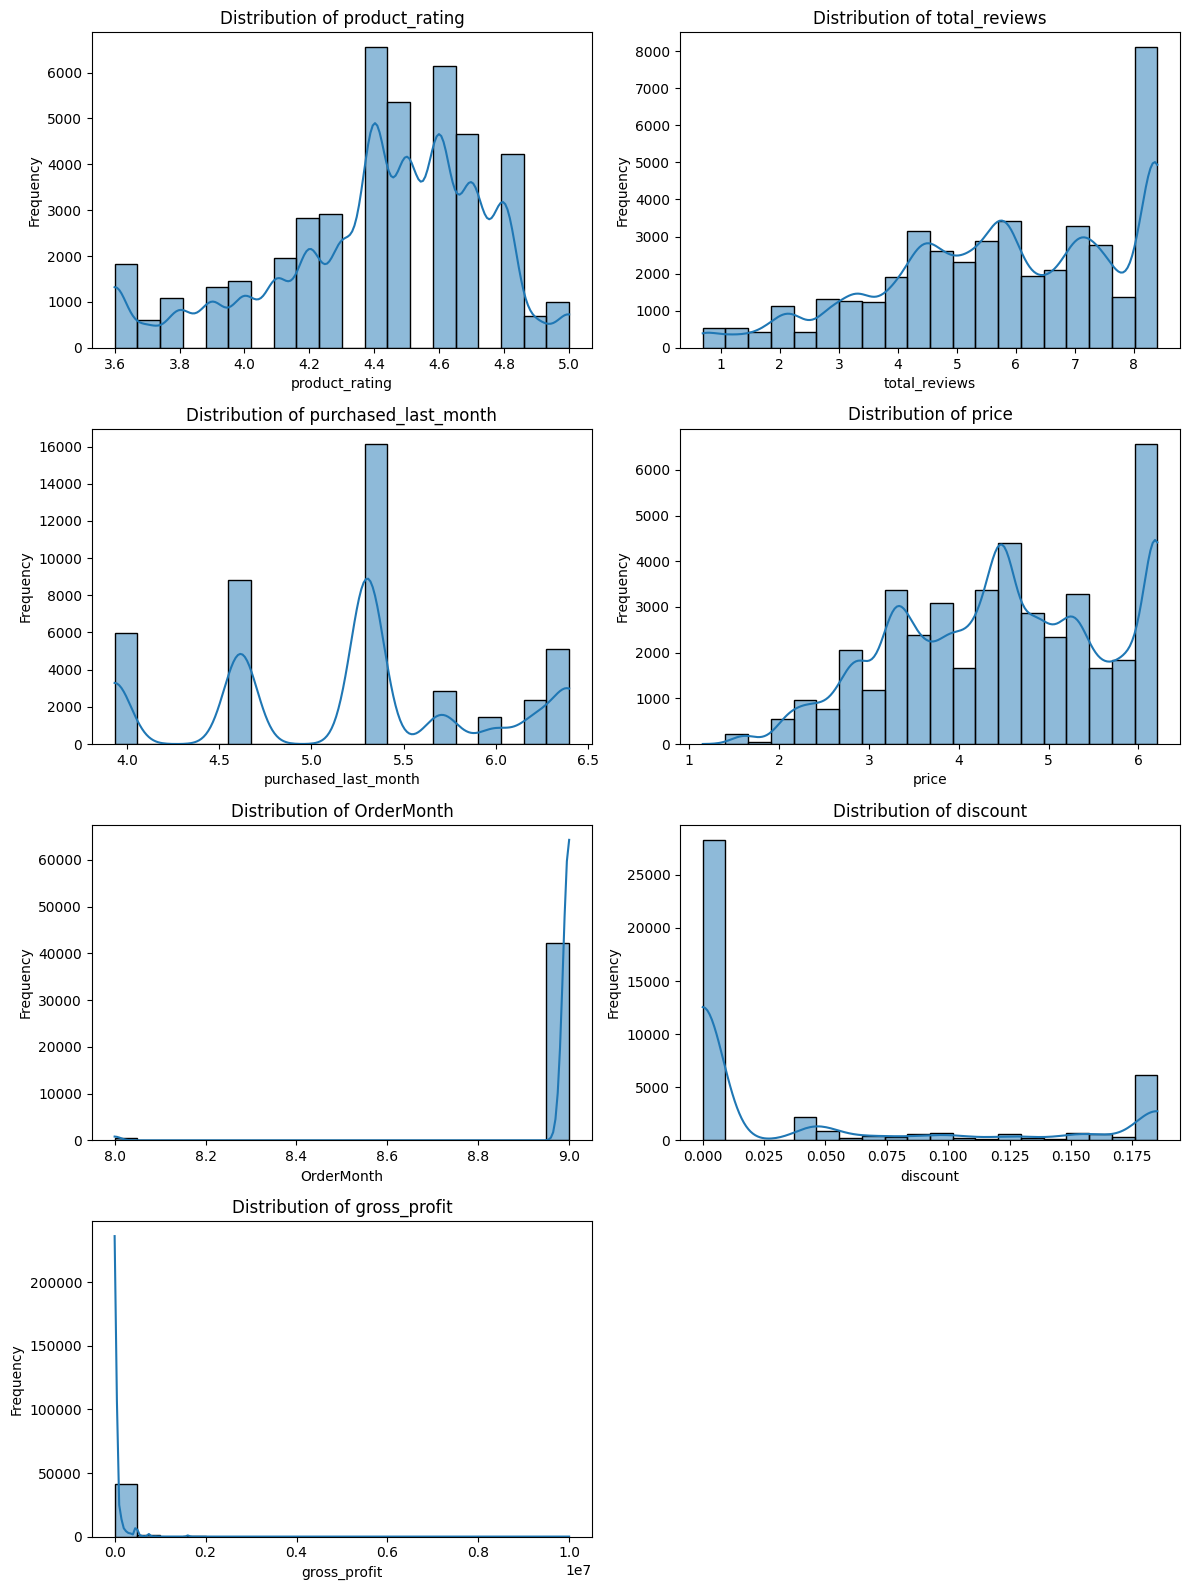

In [94]:
numeric_cols = df.select_dtypes(include=['number']).columns
num_plots = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(12, 4 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.histplot(df[col], kde=True, bins=20, edgecolor='black')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


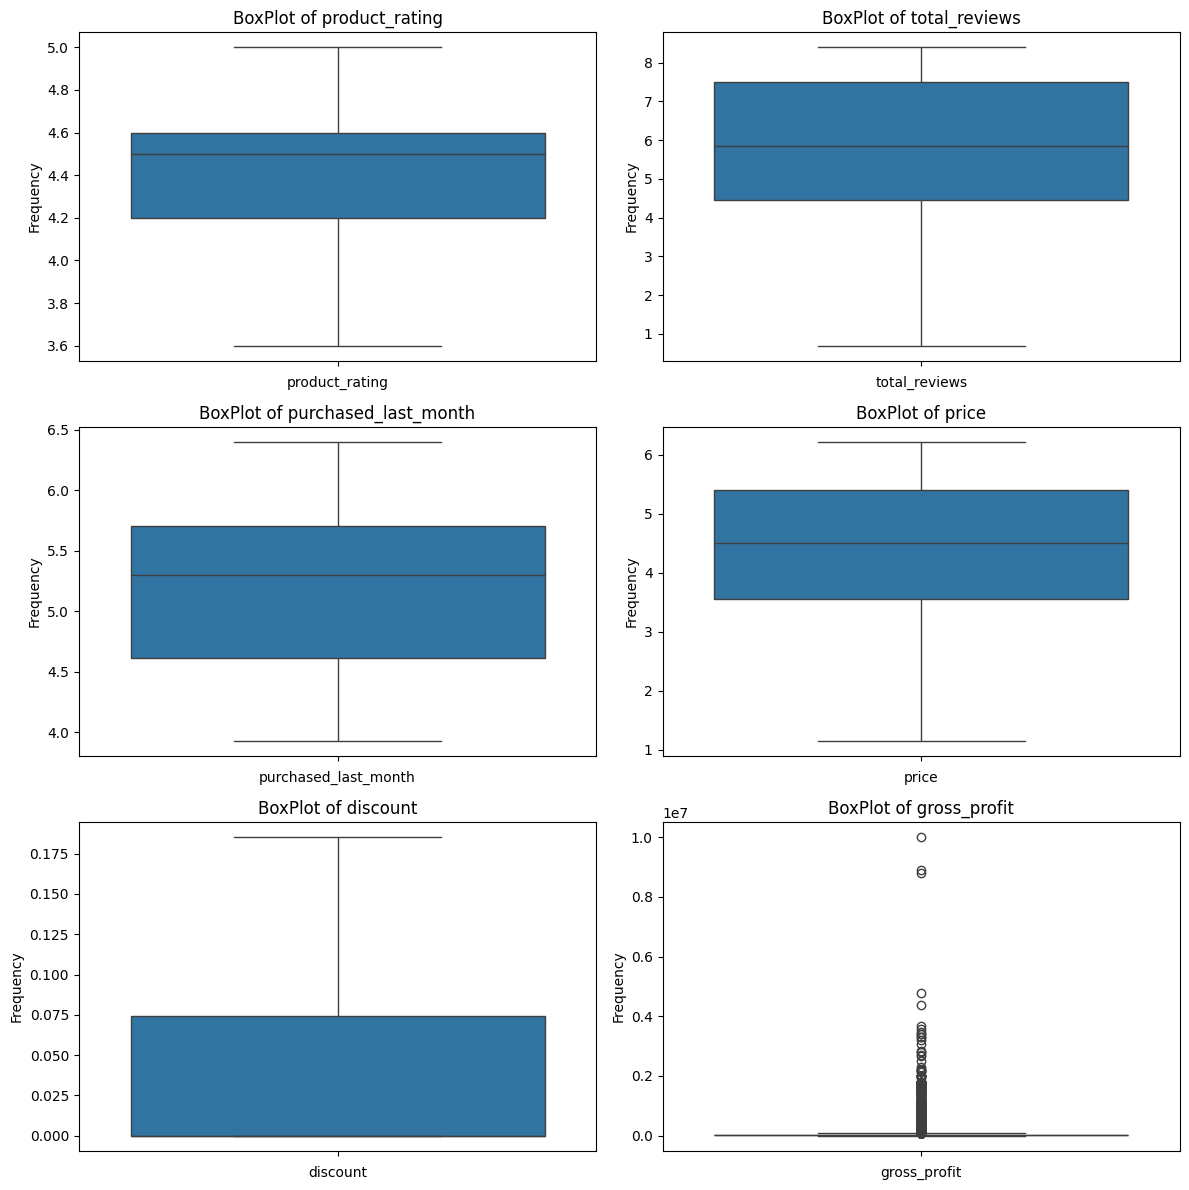

In [95]:
numeric_cols = df.drop('OrderMonth',axis=1).select_dtypes(include=['number']).columns

num_plots = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.boxplot(df[col])

    plt.title(f'BoxPlot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Feature Engieering

In [96]:
df['badge'].unique()

array(['No Badge', 'Best Seller', "Amazon's", 'Limited time deal',
       'Save 30%', 'Save 12%', 'Save 9%', 'Save 17%', 'Save 77%',
       'Ends in', 'Save 10%', 'Save 18%'], dtype=object)

In [97]:
df['badge'] = df['badge'].str.replace('Ends in',"Limited time deal")

### Converting (Save 9%, Save 18% ...etc) Into one category (Save)

In [98]:
mask = df['badge'].str.contains("Save", case=False, na=False)
df.loc[mask, 'badge'] = "Save"

In [99]:
df.groupby('badge').agg({'discount':'mean','purchased_last_month':'mean'})

,discount,purchased_last_month
badge,,
Amazon's,0.073457,5.486405
Best Seller,0.097412,6.164158
Limited time deal,0.142132,5.794104
No Badge,0.041116,5.187412
Save,0.156971,4.604039


### Feature Encoding

One-hot encoding

In [100]:
df = pd.get_dummies(df, columns=['badge'], drop_first=True, dtype=int)

In [101]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,price,is_sponsored,is_couponed,is_available,delivery_details,OrderMonth,OrderDayOfWeek,discount,category,gross_profit,best_seller_flag,badge_Best Seller,badge_Limited time deal,badge_No Badge,badge_Save
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,5.929589,5.70711,5.075174,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,9,Monday,0.185192,Phones,47700.0,True,0,0,1,0
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,7.807103,6.398595,2.832625,Sponsored,No Coupon,Add to cart,2025-08-29,8,Friday,0.185192,Laptops,95940.0,True,0,0,1,0
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,8.021256,6.398595,5.857933,Sponsored,No Coupon,Add to cart,2025-09-01,9,Monday,0.100287,Laptops,698000.0,True,0,0,1,0
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,8.397959,6.398595,5.095222,Organic,No Coupon,not available,2025-09-01,9,Monday,0.000000,Phones,1622400.0,False,1,0,0,0
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,8.397959,6.398595,4.300545,Organic,No Coupon,not available,2025-09-01,9,Monday,0.000000,Phones,727400.0,True,0,0,1,0


In [102]:
df['is_sponsored'].value_counts()

,count
is_sponsored,
Organic,35664
Sponsored,7011


Only 2 unique value best encoding is Binary Encoding

In [103]:
df['is_sponsored'] = df['is_sponsored'].map({'Organic': 0, 'Sponsored': 1})

df['is_sponsored']

,is_sponsored
0,1
1,1
2,1
3,0
4,0
...,...
42670,0
42671,0
42672,0
42673,0


In [104]:
df['is_available'].value_counts()

,count
is_available,
Add to cart,28022
not available,14653


Only 2 unique Values (Binary Encoding)

In [105]:
df['is_available'] = df['is_available'].map({'not available': 0, 'Add to cart': 1})

df['is_available']

,is_available
0,1
1,1
2,1
3,0
4,0
...,...
42670,0
42671,1
42672,1
42673,1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_title            42675 non-null  object        
 1   product_rating           42675 non-null  float64       
 2   total_reviews            42675 non-null  Float64       
 3   purchased_last_month     42675 non-null  Float64       
 4   price                    42675 non-null  float64       
 5   is_sponsored             42675 non-null  int64         
 6   is_couponed              42675 non-null  object        
 7   is_available             42675 non-null  int64         
 8   delivery_details         42675 non-null  datetime64[ns]
 9   OrderMonth               42675 non-null  int32         
 10  OrderDayOfWeek           42675 non-null  object        
 11  discount                 42675 non-null  float64       
 12  category                 42675 n

In [107]:
df.nunique()

,0
product_title,8808
product_rating,16
total_reviews,2519
purchased_last_month,7
price,2635
is_sponsored,2
is_couponed,42
is_available,2
delivery_details,24
OrderMonth,2


In [108]:
df['is_couponed'].unique()

array(['Save 15%  with coupon', 'No Coupon', 'Save 50%  with coupon',
       'Save $16.00  with coupon', 'Save $10.00  with coupon',
       'Save 10%  with coupon', 'Save $20.00  with coupon',
       'Save $4.00  with coupon', 'Save $0.33  with coupon',
       'Save $18.00  with coupon', 'Save 5%  with coupon',
       'Save $2.00  with coupon', 'Save $15.00  with coupon',
       'Save 6%  with coupon', 'Save $8.00  with coupon',
       'Save $40.00  with coupon', 'Save $1.50  with coupon',
       'Save 7%  with coupon', 'Save 20%  with coupon',
       'Save $1.00  with coupon', 'Save $5.00  with coupon',
       'Save $30.00  with coupon', 'Save $12.00  with coupon',
       'Save 25%  with coupon', 'Save $133.00  with coupon',
       'Save $50.00  with coupon', 'Save $11.00  with coupon',
       'Save 30%  with coupon', 'Save $3.00  with coupon',
       'Save 40%  with coupon', 'Save $25.00  with coupon',
       'Save $13.00  with coupon',
       'Save 25%  with coupon (some sizes/color

In [109]:
df['is_couponed'] = df['is_couponed'].astype(str).str.strip()

df['has_coupon'] = (df['is_couponed'] != 'No Coupon').astype(int)

df['coupon_type'] = np.nan
df.loc[df['is_couponed'].str.contains('%', na=False), 'coupon_type'] = 'percent'
df.loc[df['is_couponed'].str.contains(r'\$', na=False), 'coupon_type'] = 'fixed'

df['coupon_value'] = (
    df['is_couponed']
      .str.extract(r'(\d+\.?\d*)')[0]
      .astype(float)
)

df['coupon_value_norm'] = np.nan

percent_mask = df['coupon_type'] == 'percent'
fixed_mask   = df['coupon_type'] == 'fixed'

df.loc[percent_mask, 'coupon_value_norm'] = (
    df.loc[percent_mask, 'coupon_value'] / 100
)

df.loc[fixed_mask, 'coupon_value_norm'] = (
    df.loc[fixed_mask, 'coupon_value'] / df.loc[fixed_mask, 'price']
)


In [110]:
df['coupon_value_norm'] = df['coupon_value_norm'].fillna(0)
df['coupon_value'] = df['coupon_value'].fillna(0)
df['coupon_type'] = df['coupon_type'].fillna('No coupon')

In [111]:
df[['coupon_value','coupon_value_norm','coupon_type','has_coupon','is_couponed']]

,coupon_value,coupon_value_norm,coupon_type,has_coupon,is_couponed
0,15.0,0.150000,percent,1,Save 15% with coupon
1,0.0,0.000000,No coupon,0,No Coupon
2,0.0,0.000000,No coupon,0,No Coupon
3,0.0,0.000000,No coupon,0,No Coupon
4,0.0,0.000000,No coupon,0,No Coupon
...,...,...,...,...,...
42670,0.0,0.000000,No coupon,0,No Coupon
42671,25.0,5.542316,fixed,1,Save $25.00 with coupon
42672,0.0,0.000000,No coupon,0,No Coupon
42673,0.0,0.000000,No coupon,0,No Coupon


Apply Frequency encoding for Category, Date(Day of the week)

In [112]:
freq_map = df['coupon_type'].value_counts()
df['coupon_type'] = df['coupon_type'].map(freq_map).astype('int64')

df[['coupon_type']].head()

,coupon_type
0,1061
1,40727
2,40727
3,40727
4,40727


In [113]:
df.isna().sum()

,0
product_title,0
product_rating,0
total_reviews,0
purchased_last_month,0
price,0
is_sponsored,0
is_couponed,0
is_available,0
delivery_details,0
OrderMonth,0


In [114]:
df['category'].value_counts()

,count
category,
Other Electronics,8755
Laptops,8693
Phones,6563
Cameras,3677
Power & Batteries,2877
TV & Display,2630
Chargers & Cables,1833
Storage,1630
Speakers,1345


In [115]:
freq_map = df['category'].value_counts()
df['category'] = df['category'].map(freq_map).astype('int64')

df[['category']].head()

,category
0,6563
1,8693
2,8693
3,6563
4,6563


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_title            42675 non-null  object        
 1   product_rating           42675 non-null  float64       
 2   total_reviews            42675 non-null  Float64       
 3   purchased_last_month     42675 non-null  Float64       
 4   price                    42675 non-null  float64       
 5   is_sponsored             42675 non-null  int64         
 6   is_couponed              42675 non-null  object        
 7   is_available             42675 non-null  int64         
 8   delivery_details         42675 non-null  datetime64[ns]
 9   OrderMonth               42675 non-null  int32         
 10  OrderDayOfWeek           42675 non-null  object        
 11  discount                 42675 non-null  float64       
 12  category                 42675 n

In [117]:
freq_map = df['OrderDayOfWeek'].value_counts()
df['OrderDayOfWeek'] = df['OrderDayOfWeek'].map(freq_map).astype('int64')

df[['OrderDayOfWeek']].head()

,OrderDayOfWeek
0,9954
1,1941
2,9954
3,9954
4,9954


In [118]:
df.shape

(42675, 23)

## Feature Selection

### Variance Threshold

In [119]:
df_copy = df.copy(deep=True)

In [120]:
from sklearn.feature_selection import VarianceThreshold

num_df = df.select_dtypes(include='number')

vt = VarianceThreshold(threshold=0.01)
X_var = vt.fit_transform(num_df)
selected_features = num_df.columns[vt.get_support()]


removed_features = num_df.columns[~vt.get_support()]

df.drop(removed_features,axis=1,inplace=True)
print("Removed low-variance features:")
print(list(removed_features))
df.shape

Removed low-variance features:
['discount', 'badge_Best Seller', 'badge_Save']


(42675, 20)

### Correlation-based Feature Removal

In [121]:
num_df = df.select_dtypes(include='number')

corr = num_df.corr().abs()

upper = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool)
)

threshold = 0.9
to_drop = [
    col for col in upper.columns
    if any(upper[col] > threshold)
]

print(f"\nDropped {len(to_drop)} columns due to high correlation (>{threshold}):\n")

for col in to_drop:
    correlated_with = upper.index[upper[col] > threshold].tolist()
    print(f"- {col}  (correlated with {correlated_with})")
df_reduced = df.drop(columns=to_drop)

print("\nRemaining numeric columns:", df_reduced.select_dtypes(include='number').shape[1])
df.shape


Dropped 1 columns due to high correlation (>0.9):

- coupon_type  (correlated with ['has_coupon'])

Remaining numeric columns: 15


(42675, 20)

### Mutual Information


Mutual Information scores:
gross_profit               5.284734
price                      3.859709
total_reviews              3.858936
product_rating             1.855083
category                   1.795771
OrderDayOfWeek             1.233037
purchased_last_month       1.225030
is_available               0.470196
is_sponsored               0.390759
coupon_value_norm          0.265753
coupon_value               0.265302
coupon_type                0.199080
has_coupon                 0.170302
badge_No Badge             0.116096
badge_Limited time deal    0.056680
OrderMonth                 0.035784
dtype: float64

Dropped 4 columns based on low MI (≤ 0.1919):



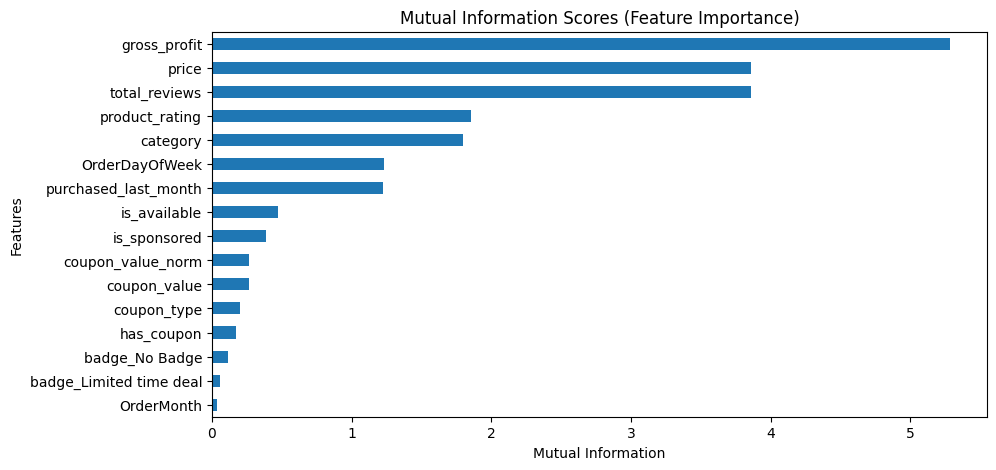

(42675, 16)

In [122]:
from sklearn.feature_selection import mutual_info_regression

X = df.select_dtypes(include='number')

pseudo_target = X.mean(axis=1)

mi_scores = mutual_info_regression(X, pseudo_target, random_state=42)

mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("\nMutual Information scores:")
print(mi_series)

threshold = mi_series.quantile(0.25)

to_drop = mi_series[mi_series <= threshold].index.tolist()

print(f"\nDropped {len(to_drop)} columns based on low MI (≤ {threshold:.4f}):\n")

plt.figure(figsize=(10, 5))
mi_series.sort_values().plot.barh()
plt.title("Mutual Information Scores (Feature Importance)")
plt.xlabel("Mutual Information")
plt.ylabel("Features")
plt.show()

df = df.drop(columns=to_drop)
df.shape


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_title         42675 non-null  object        
 1   product_rating        42675 non-null  float64       
 2   total_reviews         42675 non-null  Float64       
 3   purchased_last_month  42675 non-null  Float64       
 4   price                 42675 non-null  float64       
 5   is_sponsored          42675 non-null  int64         
 6   is_couponed           42675 non-null  object        
 7   is_available          42675 non-null  int64         
 8   delivery_details      42675 non-null  datetime64[ns]
 9   OrderDayOfWeek        42675 non-null  int64         
 10  category              42675 non-null  int64         
 11  gross_profit          42675 non-null  Float64       
 12  best_seller_flag      42675 non-null  bool          
 13  coupon_type     

## Probability & Hypothesis Testing


In [124]:
mean_sales = df_without_outliers['purchased_last_month'].mean()
std_sales = df_without_outliers['purchased_last_month'].std()

mean_sales, std_sales

(np.float64(236.32923257176333), np.float64(173.3872569961609))

In [125]:
from scipy.stats import norm
prob_high_sales = 1 - norm.cdf(mean_sales, mean_sales, std_sales)
prob_high_sales

np.float64(0.5)

In [126]:
from scipy.stats import poisson

lambda_sales = df_without_outliers['purchased_last_month'].mean()

poisson.pmf(5, lambda_sales)

np.float64(1.4188103864325928e-93)

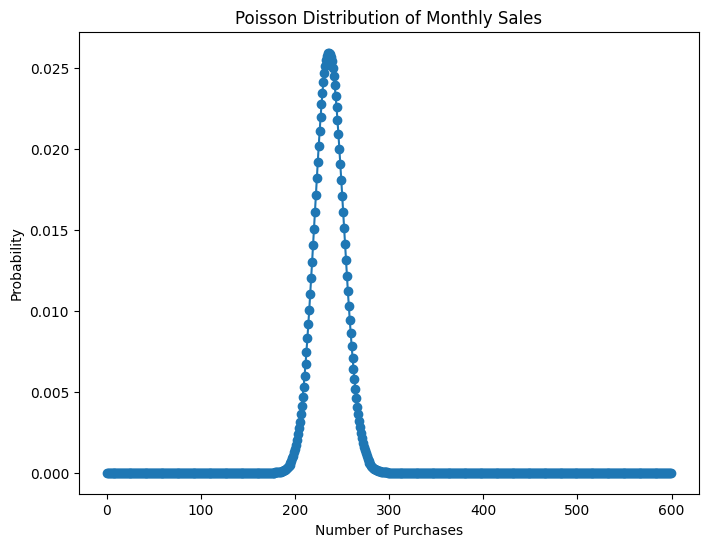

In [127]:
x = np.arange(0, df_without_outliers['purchased_last_month'].quantile(0.95))
y = poisson.pmf(x, lambda_sales)

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o')
plt.title('Poisson Distribution of Monthly Sales')
plt.xlabel('Number of Purchases')
plt.ylabel('Probability')
plt.show()


In [128]:
discounted = df_without_outliers[df_without_outliers['discount'] > 0]['purchased_last_month']
non_discounted = df_without_outliers[df_without_outliers['discount'] == 0]['purchased_last_month']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(discounted, non_discounted, nan_policy='omit')
t_stat, p_value

(np.float64(18.06140169441695), np.float64(1.1977924415895677e-72))

In [129]:
if p_value < 0.05:
    print("Reject H0 → Discounts have a significant effect on sales")
else:
    print("Fail to Reject H0 → No significant effect")

Reject H0 → Discounts have a significant effect on sales


In [130]:
sponsored = df_without_outliers[df_without_outliers['is_sponsored'] == 'Sponsored']['purchased_last_month']
non_sponsored = df_without_outliers[df_without_outliers['is_sponsored'] == 'Organic']['purchased_last_month']
t_stat, p_value = ttest_ind(sponsored, non_sponsored, nan_policy='omit')
t_stat, p_value

(np.float64(57.77809158202953), np.float64(0.0))

In [131]:
if p_value < 0.05:
    print("Sponsored products have significantly higher sales")
else:
    print("No significant difference")

Sponsored products have significantly higher sales


In [132]:
best_seller = df_without_outliers[df_without_outliers['best_seller_flag'] == 1]['purchased_last_month']
normal = df_without_outliers[df_without_outliers['best_seller_flag'] == 0]['purchased_last_month']

t_stat, p_value = ttest_ind(best_seller, normal, nan_policy='omit')
t_stat, p_value

(np.float64(-27.112540649090803), np.float64(1.6158617452173357e-160))

In [133]:
if p_value < 0.05:
    print("Reject H0 → Best Seller products have significantly higher sales")
else:
    print("Fail to Reject H0")

Reject H0 → Best Seller products have significantly higher sales


## Apply PCA, interpret components, visualize clusters/patterns

In [134]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols.head()

,product_rating,total_reviews,purchased_last_month,price,is_sponsored,is_available,OrderDayOfWeek,category,gross_profit,coupon_type,coupon_value,coupon_value_norm
0,4.6,5.929589,5.70711,5.075174,1,1,9954,6563,47700.0,1061,15.0,0.15
1,4.3,7.807103,6.398595,2.832625,1,1,1941,8693,95940.0,40727,0.0,0.00
2,4.6,8.021256,6.398595,5.857933,1,1,9954,8693,698000.0,40727,0.0,0.00
3,4.6,8.397959,6.398595,5.095222,0,0,9954,6563,1622400.0,40727,0.0,0.00
4,4.8,8.397959,6.398595,4.300545,0,0,9954,6563,727400.0,40727,0.0,0.00


In [135]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler

def get_pca(df,n=5,scaling=StandardScaler):
  num_cols = df.select_dtypes(include=['int64', 'float64'])
  scaler = scaling()
  scaled_data = scaler.fit_transform(num_cols)

  pca = PCA(n_components=n)
  pca_data = pca.fit_transform(scaled_data)
  pca_df = pd.DataFrame(
    data=pca_data,
    columns=['PC'+str(x) for x in range(1,n+1)]
  )
  return pca, pca_df,scaled_data


In [136]:
def visualize_PCA(pca,pca_df):
  print("Explained ratios for each PC:",pca.explained_variance_ratio_)
  print("Sum of the explained ratios: "+ str(pca.explained_variance_ratio_.sum()))
  explained_variance = pca.explained_variance_ratio_

  plt.figure(figsize=(8,5))
  plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, align='center')
  plt.xlabel('Principal Component')
  plt.ylabel('Explained Variance Ratio')
  plt.title('Scree Plot')
  plt.show()

  plt.figure(figsize=(8,5))
  plt.plot(np.cumsum(explained_variance), marker='o')
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.title('Cumulative Explained Variance')
  plt.grid(True)
  plt.show()

  plt.figure(figsize=(7,5))

  plt.scatter(
      pca_df['PC1'],
      pca_df['PC2'],
      c=df.loc[num_df.index, 'product_rating'],
      cmap='viridis',
      alpha=0.6
  )

  plt.colorbar(label='product_rating')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('PCA Visualization Colored by Product product_rating')
  plt.show()

         PC1       PC2       PC3
0  -0.677248  0.587799  1.695781
1   1.118270  2.218158  1.447254
2  22.962463  0.857769  0.345911
3  56.387177  0.675992 -0.868916
4  24.001260  1.761863 -1.274696
Explained ratios for each PC: [0.92513508 0.02932195 0.01687637]
Sum of the explained ratios: 0.9713334019758177


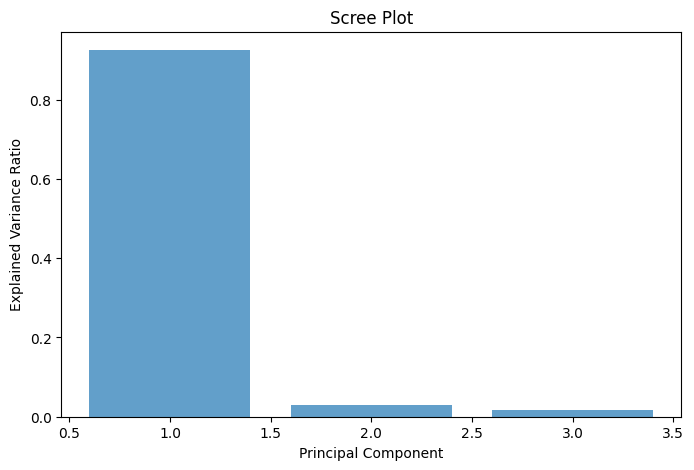

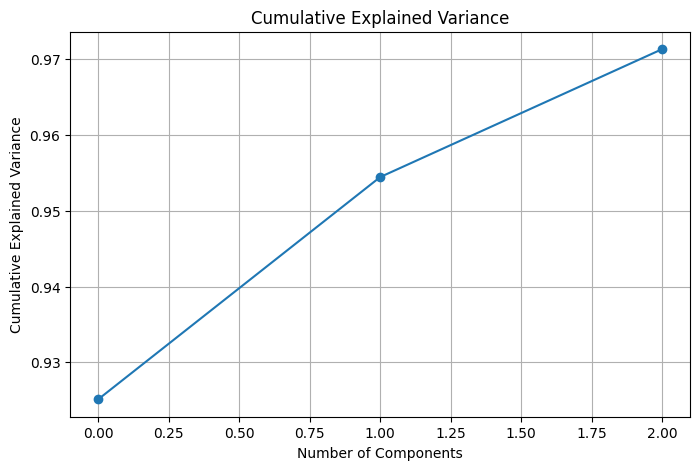

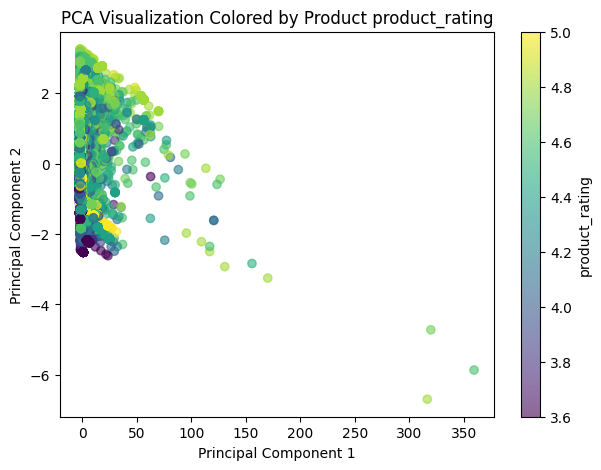

In [145]:
pca1, pca_df1,X_scaled1 = get_pca(df,n=3,scaling=RobustScaler)
print(pca_df1.head())
visualize_PCA(pca1,pca_df1)

        PC1       PC2       PC3       PC4       PC5
0  0.528470 -0.223493  1.268574  0.689270  1.470247
1  1.994944  3.294449  5.684613 -6.447613 -0.300201
2  2.402979  3.106923  0.287837  1.856903 -0.415420
3  4.047710  6.032288 -0.684371  2.951232 -2.443282
4  3.500013  2.603074 -1.052024  0.812851 -1.088898
Explained ratios for each PC: [0.2833436  0.18699322 0.14279226 0.13008149 0.11848992]
Sum of the explained ratios: 0.8617004940699926


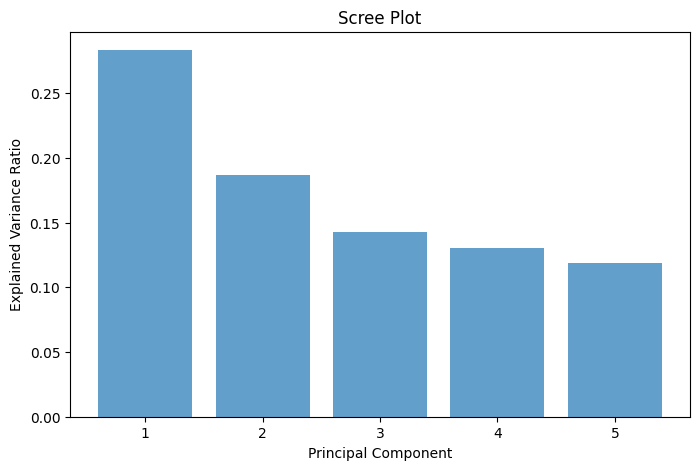

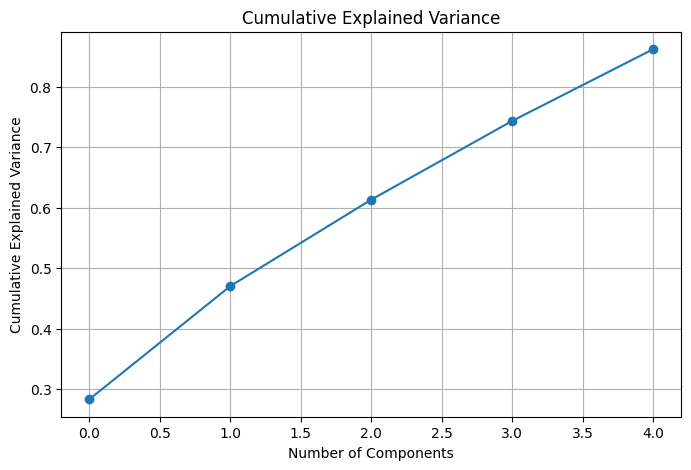

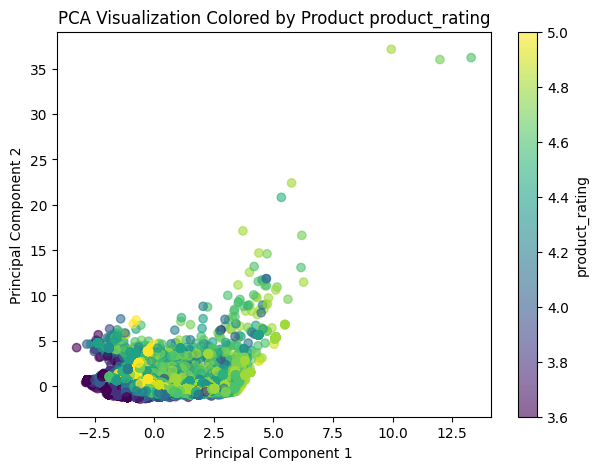

In [146]:
pca, pca_df,X_scaled = get_pca(df,n=5,scaling=StandardScaler)
print(pca_df.head())
visualize_PCA(pca,pca_df)

In [139]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,price,is_sponsored,is_couponed,is_available,delivery_details,OrderDayOfWeek,category,gross_profit,best_seller_flag,coupon_type,coupon_value,coupon_value_norm
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,5.929589,5.70711,5.075174,1,Save 15% with coupon,1,2025-09-01,9954,6563,47700.0,True,1061,15.0,0.15
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,7.807103,6.398595,2.832625,1,No Coupon,1,2025-08-29,1941,8693,95940.0,True,40727,0.0,0.00
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,8.021256,6.398595,5.857933,1,No Coupon,1,2025-09-01,9954,8693,698000.0,True,40727,0.0,0.00
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,8.397959,6.398595,5.095222,0,No Coupon,0,2025-09-01,9954,6563,1622400.0,False,40727,0.0,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,8.397959,6.398595,4.300545,0,No Coupon,0,2025-09-01,9954,6563,727400.0,True,40727,0.0,0.00


Higher rating → higher average sales (usually).


## GUI With Gradio

In [147]:
df_without_outliers.to_csv('Cleaned.csv',index=False)
pca_df.to_csv('PCA.csv',index=False)

In [148]:
def insight_1():
    fig, ax = plt.subplots(dpi=100, constrained_layout=True)

    ax.hist(df['price'], bins=30)
    ax.set_title('Price Distribution')
    ax.set_xlabel('Price')
    ax.set_ylabel('Count')

    plt.close(fig)
    return fig


def insight_2():
  fig, ax = plt.subplots(dpi=100, constrained_layout=True)

  top5_categories = (
      df_original.groupby('category')['gross_profit']
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index
  )

  df_top5 = df_original[df_original['category'].isin(top5_categories)]

  sns.barplot(
      data=df_top5,
      x='category',
      y='gross_profit',
      hue='is_sponsored',
      ax=ax
  )

  ax.set_title("Profit by Category and Sponsorship (Top 5)")
  ax.set_xlabel("Category")
  ax.set_ylabel("Average Gross Profit")
  ax.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.close(fig)
  return fig


def insight_3():
    fig, ax = plt.subplots(dpi=100, constrained_layout=True)

    ax.hist(df['product_rating'], bins=20)
    ax.set_title('Rating Distribution')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')

    plt.close(fig)

    return fig

def insight_4():
  fig, ax = plt.subplots(dpi=100, constrained_layout=True)

  top_categories = (
      df_without_outliers
      .groupby('category')['gross_profit']
      .mean()
      .sort_values(ascending=False)
      .head(10)
  )

  top_categories.plot(
      kind='bar',
      ax=ax,
      color='skyblue',
      edgecolor='black'
  )

  ax.set_title('Top 10 Categories by Average Profit')
  ax.set_ylabel('Average Profit')
  ax.set_xlabel('Category')
  ax.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.close(fig)
  return fig

def insight_5():
  fig, ax = plt.subplots(dpi=100, constrained_layout=True)

  top_categories = (
      df_original
      .groupby('category')['product_rating']
      .mean()
      .sort_values(ascending=False)
      .head(10)
  )

  top_categories.plot(
      kind='bar',
      ax=ax,
      color='skyblue',
      edgecolor='black'
  )

  ax.set_title('Top 10 Categories by Average Rating')
  ax.set_ylabel('Average Rating')
  ax.set_xlabel('Category')
  ax.set_ylim(4, 5)
  ax.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.close(fig)
  return fig



def insight_6():
  fig, ax = plt.subplots(dpi=100, constrained_layout=True)

  top_categories = (
      df_original
      .groupby('category')['total_reviews']
      .mean()
      .sort_values(ascending=False)
      .head(10)
  )

  top_categories.plot(
      kind='bar',
      ax=ax,
      color='skyblue',
      edgecolor='black'
  )

  ax.set_title('Top 10 Categories by Total Reviews')
  ax.set_ylabel('Average Reviews')
  ax.set_xlabel('Category')
  ax.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.close(fig)
  return fig



def insight_7():
  fig, ax = plt.subplots(dpi=100, constrained_layout=True)

  top_categories = (
      df_without_outliers
      .groupby('category')['purchased_last_month']
      .mean()
      .sort_values(ascending=False)
      .head(10)
  )

  top_categories.plot(
      kind='bar',
      ax=ax,
      color='skyblue',
      edgecolor='black'
  )

  ax.set_title('Top 10 Categories by Average Sales')
  ax.set_ylabel('Average Sales')
  ax.set_xlabel('Category')
  ax.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.close(fig)
  return fig



def insight_8():
  fig, ax = plt.subplots(dpi=100, constrained_layout=True)

  avg_sales = (
      df_without_outliers.groupby('OrderDayOfWeek')['purchased_last_month']
        .mean()
        .sort_values(ascending=False)
        .head(10)
  )

  avg_sales.plot(
      kind='bar',
      ax=ax,
      color='skyblue',
      edgecolor='black'
  )

  ax.set_title('Average Sales by Day of Week')
  ax.set_ylabel('Average Sales')
  ax.set_xlabel('Day of Week')
  ax.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.close(fig)
  return fig


def insight_9():
  fig, ax = plt.subplots(dpi=100, constrained_layout=True)

  top5_categories = (
      df_original.groupby('category')['product_rating']
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index
  )

  df_top5 = df_original[df_original['category'].isin(top5_categories)]

  sns.barplot(
      data=df_top5,
      x='category',
      y='product_rating',
      hue='is_sponsored',
      ax=ax
  )

  ax.set_title("Ratings by Category and Sponsorship (Top 5)")
  ax.set_xlabel("Category")
  ax.set_ylabel("Average Rating")
  ax.set_ylim(4, 5)
  ax.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.close(fig)
  return fig
def insight_10():
  fig, ax = plt.subplots(dpi=100, constrained_layout=True)

  sns.lineplot(
      data=df_without_outliers,
      x='product_rating',
      y='total_reviews',
      ax=ax
  )

  ax.set_title("Rating vs Total Reviews")
  ax.set_xlabel("Product Rating")
  ax.set_ylabel("Total Reviews")

  plt.tight_layout()
  plt.close(fig)
  return fig


def insight_11():
  fig, ax = plt.subplots(dpi=100, constrained_layout=True)

  top_categories = (
      df_original
      .groupby('category')['gross_profit']
      .mean()
      .sort_values(ascending=False)
      .head(10)
  )

  top_categories.plot(
      kind='bar',
      ax=ax,
      color='skyblue',
      edgecolor='black'
  )

  ax.set_title('Top 10 Categories by Average Profit')
  ax.set_ylabel('Average Profit')
  ax.set_xlabel('Category')
  ax.tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.close(fig)
  return fig


In [149]:
import io
from PIL import Image

def fig_to_image(fig):
    fig.set_size_inches(6,5)


    buf = io.BytesIO()
    fig.savefig(
        buf,
        format="jpeg",
        bbox_inches="tight"
    )
    buf.seek(0)

    img = Image.open(buf).convert("RGB")
    return img
custom_css = """
.gallery-item img {
    width: 100%;
    height: 100%;
    object-fit: contain;
}

"""



In [150]:
pca_df = pd.read_csv("PCA.csv")
df = pd.read_csv("Cleaned.csv")

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.drop('product_title',axis=1).select_dtypes(include=['object','category']).columns.tolist()
all_cols = df.columns.tolist()
pca_cols = pca_df.columns.tolist()

y = df['product_rating']
def empty_fig(msg="Select PCs"):
    fig, ax = plt.subplots(figsize=(6,4), dpi=120)
    ax.text(0.5, 0.5, msg, ha="center", va="center")
    ax.axis("off")
    plt.close(fig)
    return fig

def extract_pc(label):
    return label.split(" ")[0]

def plot_pca(pc_x_label, pc_y_label, y_data, data, scaler_name):
    fig, ax = plt.subplots(figsize=(7,6), dpi=120)

    if pc_x_label is None or pc_y_label is None:
        plt.close(fig)
        return fig

    pc_x = extract_pc(pc_x_label)
    pc_y = extract_pc(pc_y_label)

    pca_df = data["pca_df"]
    pca = data["pca"]

    if y_data is not None and not y_data.empty:
        if len(pca_df) == len(y_data):
            sc = ax.scatter(pca_df[pc_x], pca_df[pc_y], c=y_data, alpha=0.7)
            plt.colorbar(sc, ax=ax, label=y_data.name)
        else:
            ax.scatter(pca_df[pc_x], pca_df[pc_y], alpha=0.7)
            print("Warning: PCA data length does not match target data length.")
    else:
        ax.scatter(pca_df[pc_x], pca_df[pc_y], alpha=0.7)


    ax.set_xlabel(pc_x_label)
    ax.set_ylabel(pc_y_label)
    ax.set_title(f"{scaler_name} PCA: {pc_x} vs {pc_y}")
    ax.grid(True)
    plt.close(fig)
    return fig

def plot_scree(pca):
    fig, ax = plt.subplots(figsize=(6,4), dpi=120)
    evr = pca.explained_variance_ratio_
    ax.bar(range(1,len(evr)+1), evr)
    ax.set_ylim(0,1)
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Explained Variance Ratio")
    ax.set_title("Scree Plot")
    ax.grid(True)
    plt.close(fig)
    return fig

def plot_cumulative_variance(pca):
    fig, ax = plt.subplots(figsize=(6,4), dpi=120)
    cum = np.cumsum(pca.explained_variance_ratio_)
    ax.plot(range(1,len(cum)+1), cum, marker="o")
    ax.set_ylim(0,1)
    ax.set_xlabel("Number of Components")
    ax.set_ylabel("Cumulative Explained Variance")
    ax.set_title("Cumulative Explained Variance")
    ax.grid(True)
    plt.close(fig)
    return fig

pca_cols_std = [f"PC{i+1} ({pca.explained_variance_ratio_[i]*100:.1f}%)"
                for i in range(len(pca.explained_variance_ratio_))]
pca_cols_rob = [f"PC{i+1} ({pca1.explained_variance_ratio_[i]*100:.1f}%)"
                for i in range(len(pca1.explained_variance_ratio_))]

PCA_STORE = {
    "StandardScaler": {"pca": pca, "pca_df": pca_df, "cols": pca_cols_std},
    "RobustScaler": {"pca": pca1, "pca_df": pca_df1, "cols": pca_cols_rob}
}
import gradio as gr
def update_pc_dropdowns(scaler):
    cols = PCA_STORE[scaler]["cols"]
    return (
        gr.update(choices=cols, value=cols[0]),
        gr.update(choices=cols, value=cols[1])
    )


def update_all_pca_plots(scaler, pc_x, pc_y, target_col):
    data = PCA_STORE[scaler]

    if target_col and target_col != 'None' and target_col in df.columns:
        y_data = df[target_col]
    else:
        y_data = None
    fig_scatter = plot_pca(pc_x, pc_y, y_data, data, scaler)
    fig_scree = plot_scree(data["pca"])
    fig_cumulative = plot_cumulative_variance(data["pca"])
    return fig_scatter, fig_scree, fig_cumulative

In [151]:
import gradio as gr

def main_insights():
    insights = [
        (insight_1(), "Price distribution is right-skewed, indicating most products are low-priced"),
        (insight_2(), "Sponsored Products make more profit"),
        (insight_3(), "Ratings are concentrated between 4.3 and 4.8"),
        (insight_4(), "Top 10 categories by gross profit"),
        (insight_5(), "Top 10 categories by average rating"),
        (insight_6(), "Top 10 categories by total reviews"),
        (insight_7(), "Top 10 categories by average sales"),
        (insight_8(), "Monday generates more sales that any other day of the week"),
        (insight_9(), "Sponsored products have higher rating"),
        (insight_10(), "most of the products with more numbers of reviews have a higher rating")
            ]

    gallery_items = []
    for fig, text in insights:
        img = fig_to_image(fig)
        gallery_items.append((img, text))

    return gallery_items



def plot_hist(column, kde):
    if column is None or column == "":
        fig, ax = plt.subplots()
        ax.text(0.5, 0.5, "No column selected", ha='center', va='center')
        plt.close(fig)
        return fig
    fig, ax = plt.subplots()
    sns.histplot(df[column], kde=kde, bins=20, color='skyblue', ax=ax)
    ax.set_title(f"Histogram of {column}")
    plt.close(fig)
    return fig

def plot_box(column):
    if column is None or column == "":
        fig, ax = plt.subplots()
        ax.text(0.5, 0.5, "No column selected", ha='center', va='center')
        plt.close(fig)
        return fig
    fig, ax = plt.subplots()
    df.boxplot(column=column, ax=ax)
    ax.set_title(f"Boxplot of {column}")
    plt.close(fig)
    return fig

def plot_scatter(x_col, y_col, color_col=None):
    if x_col is None or y_col is None:
        fig, ax = plt.subplots()
        ax.text(0.5,0.5,"Select X and Y columns",ha='center',va='center')
        plt.close(fig)
        return fig
    fig, ax = plt.subplots()
    if color_col is not None and color_col != "":
        codes = pd.Categorical(df[color_col]).codes
        scatter = ax.scatter(
            df[x_col],
            df[y_col],
            c=codes,
            cmap='viridis',
            alpha=0.7
        )
        if df[color_col].dtype.name == 'category' or df[color_col].dtype == object:
            legend1 = ax.legend(*scatter.legend_elements(), title=color_col)
            ax.add_artist(legend1)
    else:
        ax.scatter(df[x_col], df[y_col], alpha=0.7)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"Scatterplot: {x_col} vs {y_col}")
    plt.close(fig)
    return fig

def plot_bar(column):
    if column is None or column == "":
        fig, ax = plt.subplots()
        ax.text(0.5,0.5,"No column selected",ha='center',va='center')
        plt.close(fig)
        return fig
    fig, ax = plt.subplots()
    df[column].value_counts().plot(kind='bar', ax=ax, color='orange')
    ax.set_title(f"Barplot of {column}")
    plt.close(fig)
    return fig


with gr.Blocks(css=custom_css) as demo:
    gr.Markdown("## Dashboard")

    with gr.Tab("Main Insights"):
      main_plots = gr.Gallery(
          label="All Insights",
          columns=2,
          height="400px",
      )

      main_insights_btn = gr.Button("Load Insights")
      main_insights_btn.click(
          fn=main_insights,
          outputs=main_plots
      )
      demo.load(main_insights, outputs=main_plots)




    with gr.Tab("Histogram"):
        hist_col = gr.Dropdown(numeric_cols, label="Select Numeric Column")
        kde = gr.Checkbox(label="KDE")
        hist_plot = gr.Plot()
        hist_col.change(plot_hist, inputs=[hist_col, kde], outputs=hist_plot)
        kde.change(plot_hist, inputs=[hist_col, kde], outputs=hist_plot)

    with gr.Tab("Boxplot"):
        box_col = gr.Dropdown(numeric_cols, label="Select Column")
        box_plot = gr.Plot()
        box_col.change(plot_box, inputs=box_col, outputs=box_plot)

    with gr.Tab("Scatterplot"):
        scatter_x = gr.Dropdown(numeric_cols, label="X-axis")
        scatter_y = gr.Dropdown(numeric_cols, label="Y-axis")
        scatter_color = gr.Dropdown(all_cols + [""], value="", label="Color (optional)")
        scatter_plot = gr.Plot()
        scatter_x.change(plot_scatter, inputs=[scatter_x, scatter_y, scatter_color], outputs=scatter_plot)
        scatter_y.change(plot_scatter, inputs=[scatter_x, scatter_y, scatter_color], outputs=scatter_plot)
        scatter_color.change(plot_scatter, inputs=[scatter_x, scatter_y, scatter_color], outputs=scatter_plot)

    with gr.Tab("Barplot"):
        bar_col = gr.Dropdown(categorical_cols, label="Select Column")
        bar_plot = gr.Plot()
        bar_col.change(plot_bar, inputs=bar_col, outputs=bar_plot)



    with gr.Tab("PCA"):
      gr.Markdown("### 📊 PCA Visualizations")

      scaler_choice = gr.Radio(["StandardScaler","RobustScaler"], label="Scaler", value="StandardScaler")

      with gr.Row():
        pca_x = gr.Dropdown(pca_cols_std)
        pca_y = gr.Dropdown(pca_cols_std)
        target_choices = ['None'] + numeric_cols
        target_choice = gr.Dropdown(
            target_choices,
            label="Target Variable (Color By)",
        value='product_rating' if 'product_rating' in target_choices else target_choices[0])

      pca_plot = gr.Plot(value=empty_fig())
      with gr.Row():
        scree_plot = gr.Plot(value=plot_scree(pca))
        cumulative_plot = gr.Plot(value=plot_cumulative_variance(pca))

      scaler_choice.change(update_pc_dropdowns, inputs=[scaler_choice], outputs=[pca_x,pca_y])
      for comp in [scaler_choice, pca_x, pca_y, target_choice]:
          comp.change(
              update_all_pca_plots,
              inputs=[scaler_choice, pca_x, pca_y, target_choice],
              outputs=[pca_plot, scree_plot, cumulative_plot]
          )


demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4639168096b8902565.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
